Based on the Time for Change Model (Abramowitz)

The *Time for Change* Model predicts the incumbent president's popular vote percentage
according to the following pieces of information:
- `NETAPP`	Incumbent president’s net approval rating (approval-dis-approval)
in the final Gallup Poll in June
- `G2GDP`	Annualized growth rate of real GDP in the second quarter of the election year
- `TERM1INC`	Presence (1) or absence (0) of a first-term incumbent in the race
- `A`	Constant = 47.26
- `V`	Incumbent share of the two-party presidential vote

## Vote equation
The model’s vote equation reads as:
```
V = A + 0.108 NETAPP + 0.543 Q2GDP + 4.313 TERM1INC
```

I believe that inflation also needs to be incorporated and that these coefficients might change in midterm years.

In [2]:
from time_for_change_data import load_compiled_time_for_change_data
compiled_data = load_compiled_time_for_change_data()

In [3]:
compiled_data['Incumbent'].sum()/len(compiled_data['Incumbent'])

0.6486486486486487

In [4]:
from bambi import Model, Prior
# priors = {'Incumbent': Prior('Bernoulli', p=compiled_data['Incumbent'].sum()/len(compiled_data['Incumbent']))}
#model = Model('p(Result, n) ~ GDP + "Net Approval" + Incumbent', compiled_data, family='binomial')
model = Model('Result ~ GDP + "Net Approval" + Incumbent',
              compiled_data,
              # priors=priors,
              dropna=True)
model

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
Automatically removing 18/37 rows from the dataset.


Formula: Result ~ GDP + "Net Approval" + Incumbent
Family name: Gaussian
Link: identity
Observations: 19
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 51.6842, sigma: 23.8121)
    GDP ~ Normal(mu: 0.0, sigma: 3.5815)
    Net Approval ~ Normal(mu: 0.0, sigma: 0.5082)
    Incumbent ~ Normal(mu: 0.0, sigma: 26.1606)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 5.0477)

In [5]:
model_results = model.fit(draws=5000)
model_results

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Result_sigma, Incumbent, Net Approval, GDP, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Net Approval'}>],
       [<AxesSubplot:title={'center':'Incumbent'}>,
        <AxesSubplot:title={'center':'Result_sigma'}>, <AxesSubplot:>]],
      dtype=object)

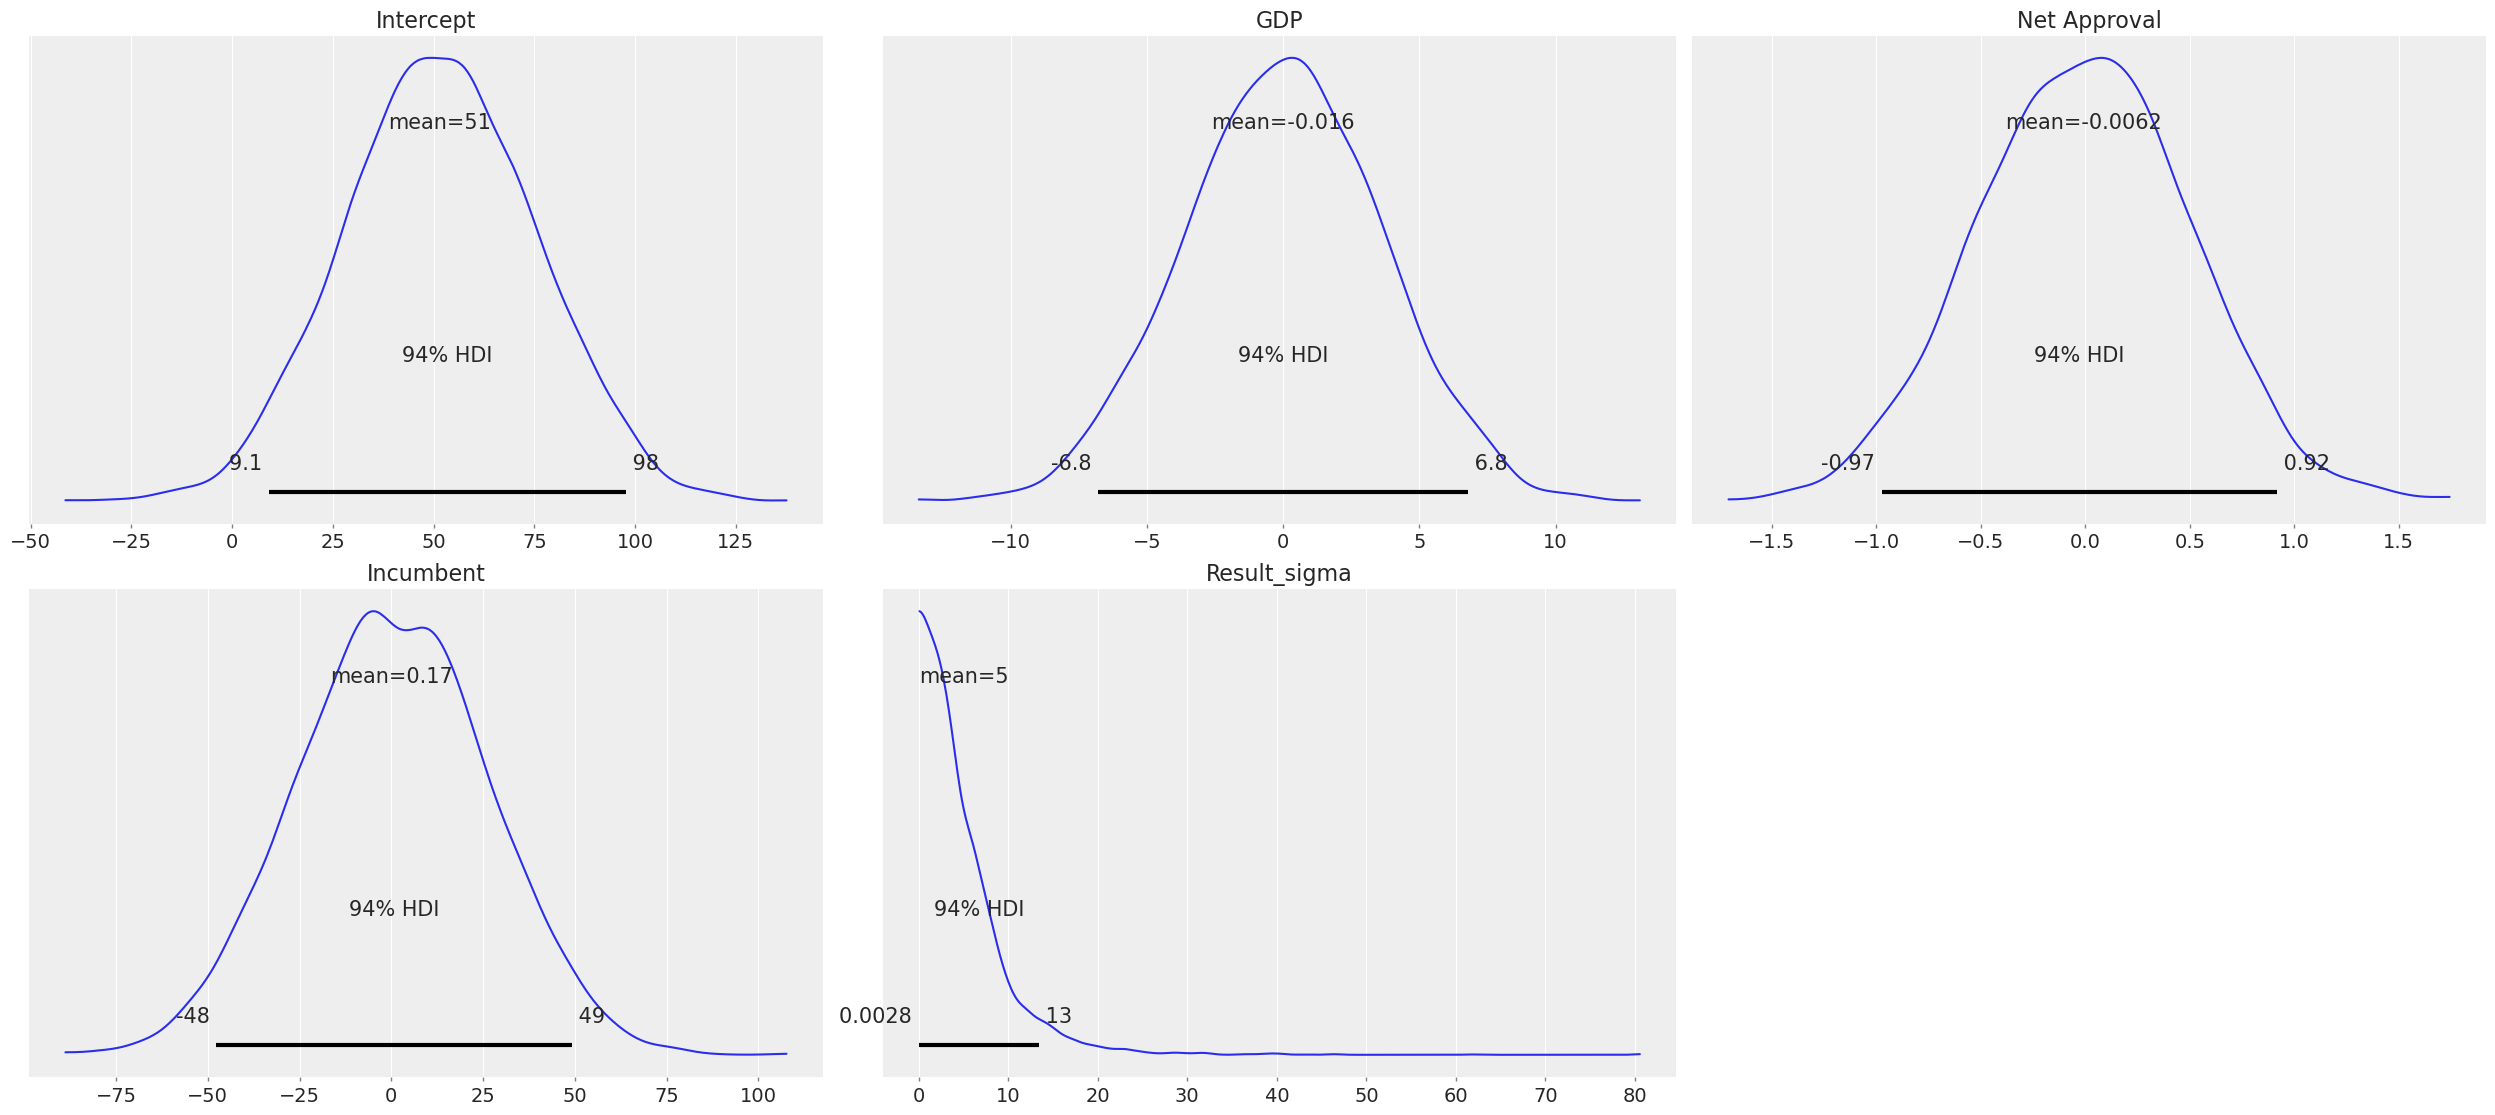

In [6]:
import arviz as az
az.style.use('arviz-darkgrid')
model.plot_priors()

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Net Approval'}>,
        <AxesSubplot:title={'center':'Net Approval'}>],
       [<AxesSubplot:title={'center':'Incumbent'}>,
        <AxesSubplot:title={'center':'Incumbent'}>],
       [<AxesSubplot:title={'center':'Result_sigma'}>,
        <AxesSubplot:title={'center':'Result_sigma'}>]], dtype=object)

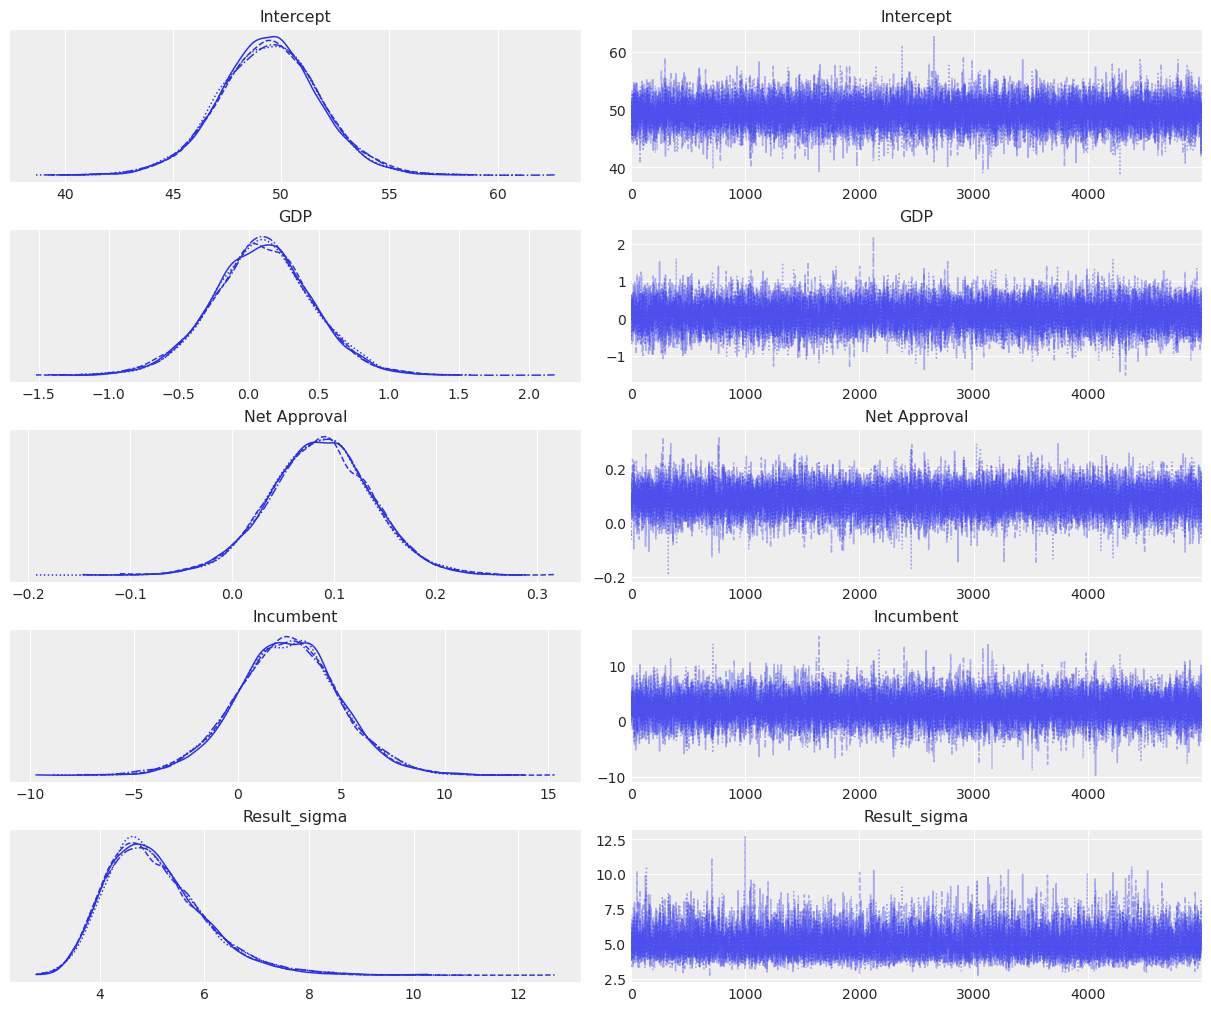

In [7]:
az.plot_trace(model_results)

In [8]:
summary = az.summary(model_results)
summary

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept     49.439  2.332  45.228   54.069      0.017    0.012   17953.0   
GDP            0.094  0.358  -0.563    0.798      0.003    0.002   15383.0   
Net Approval   0.086  0.051  -0.010    0.181      0.000    0.000   14784.0   
Incumbent      2.416  2.500  -2.458    7.022      0.018    0.015   20364.0   
Result_sigma   5.064  0.955   3.438    6.827      0.008    0.006   13441.0   

              ess_tail  r_hat  
Intercept      14010.0    1.0  
GDP            14467.0    1.0  
Net Approval   13172.0    1.0  
Incumbent      13741.0    1.0  
Result_sigma   11650.0    1.0

## Vote equation
The model’s vote equation reads as:
```
V = A + 0.108 NETAPP + 0.543 Q2GDP + 4.313 TERM1INC
A = 47.26
```



In [9]:
summary['mean']

Intercept       49.439
GDP              0.094
Net Approval     0.086
Incumbent        2.416
Result_sigma     5.064
Name: mean, dtype: float64

In [10]:
means = summary['mean']
compiled_data['Updated Prediction'] = means['Intercept'] + means['GDP']*compiled_data['GDP'] +means['Net Approval']*compiled_data['Net Approval'] + means['Incumbent']*compiled_data['Incumbent']

compiled_data['Updated Prediction']

1948    49.525268
1950    51.680952
1952    49.957533
1954    54.894579
1956    56.810802
1958    51.915269
1960    52.212472
1962    56.787403
1964    57.509990
1966    53.333073
1968    51.771465
1970    53.934307
1972    54.326988
1974    46.839409
1976    50.449223
1978    52.426346
1980    49.460144
1982    51.588006
1984    53.982690
1986    53.054949
1988    50.548552
1990    56.553800
1992    50.690957
1994    51.994188
1996    53.091200
1998    52.059999
2000    51.222000
2002    56.881351
2004    52.167072
2006    47.740863
2008    46.128732
2010    52.216182
2012    52.164139
2014    48.895488
2016    50.083557
2018    51.046838
2020    49.883128
Name: Updated Prediction, dtype: float64

In [11]:
from sklearn.metrics import mean_squared_error
result_not_null = compiled_data[compiled_data['Result'].notnull()]
tfc_mse = mean_squared_error(result_not_null['Result'], result_not_null['Time For Change Prediction'], squared=False)
updated_mse = mean_squared_error(result_not_null['Result'], result_not_null['Updated Prediction'], squared=False)
print({'Time for Change': tfc_mse, 'Updated Prediction': updated_mse})

{'Time for Change': 4.773923703903969, 'Updated Prediction': 4.304898899062464}


Our updated model is *slightly* more accurate, but note that the original model is within the confidence interval of ours.

In [12]:
compiled_data['Avg Inflation']

1948         NaN
1950         NaN
1952         NaN
1954         NaN
1956         NaN
1958         NaN
1960         NaN
1962         NaN
1964         NaN
1966         NaN
1968         NaN
1970         NaN
1972         NaN
1974         NaN
1976         NaN
1978         NaN
1980         NaN
1982         NaN
1984    4.410858
1986    3.676793
1988    4.258259
1990    4.904681
1992    2.598735
1994    2.904296
1996    2.970630
1998    2.880526
2000    3.078659
2002    2.651725
2004    2.570994
2006    3.132790
2008    3.115855
2010    0.542147
2012    2.226265
2014    2.197790
2016    2.712065
2018    2.674912
2020    2.606806
Name: Avg Inflation, dtype: float64

Automatically removing 27/37 rows from the dataset.


Formula: Result ~ GDP + "Net Approval" + Incumbent + "Avg Inflation"
Family name: T
Link: identity
Observations: 10
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 50.4, sigma: 10.3199)
    GDP ~ Normal(mu: 2.9637, sigma: 3.3091)
    Net Approval ~ Normal(mu: 8.8919, sigma: 26.1797)
    Incumbent ~ Bernoulli(p: 0.6486)
    Avg Inflation ~ Normal(mu: 2.9534, sigma: 0.9361)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 4.128)
    nu ~ Gamma(alpha: 2, beta: 0.1)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [Result_nu, Result_sigma, Avg Inflation, Net Approval, GDP, Intercept]
>BinaryGibbsMetropolis: [Incumbent]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 10 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept      40.047   3.002  34.322   45.587      0.022    0.016   17794.0   
GDP             0.021   0.375  -0.660    0.756      0.003    0.003   15260.0   
Net Approval   -0.021   0.097  -0.195    0.171      0.001    0.001   15952.0   
Incumbent       0.724   0.447   0.000    1.000      0.003    0.002   23683.0   
Avg Inflation   3.232   0.857   1.577    4.791      0.007    0.005   16444.0   
Result_sigma    3.837   1.202   1.966    6.077      0.012    0.009    9587.0   
Result_nu      20.392  14.032   1.118   45.427      0.108    0.077   13159.0   

               ess_tail  r_hat  
Intercept       13631.0    1.0  
GDP             12066.0    1.0  
Net Approval    12487.0    1.0  
Incumbent       20000.0    1.0  
Avg Inflation   13301.0    1.0  
Result_sigma     8373.0    1.0  
Result_nu        9878.0    1.0

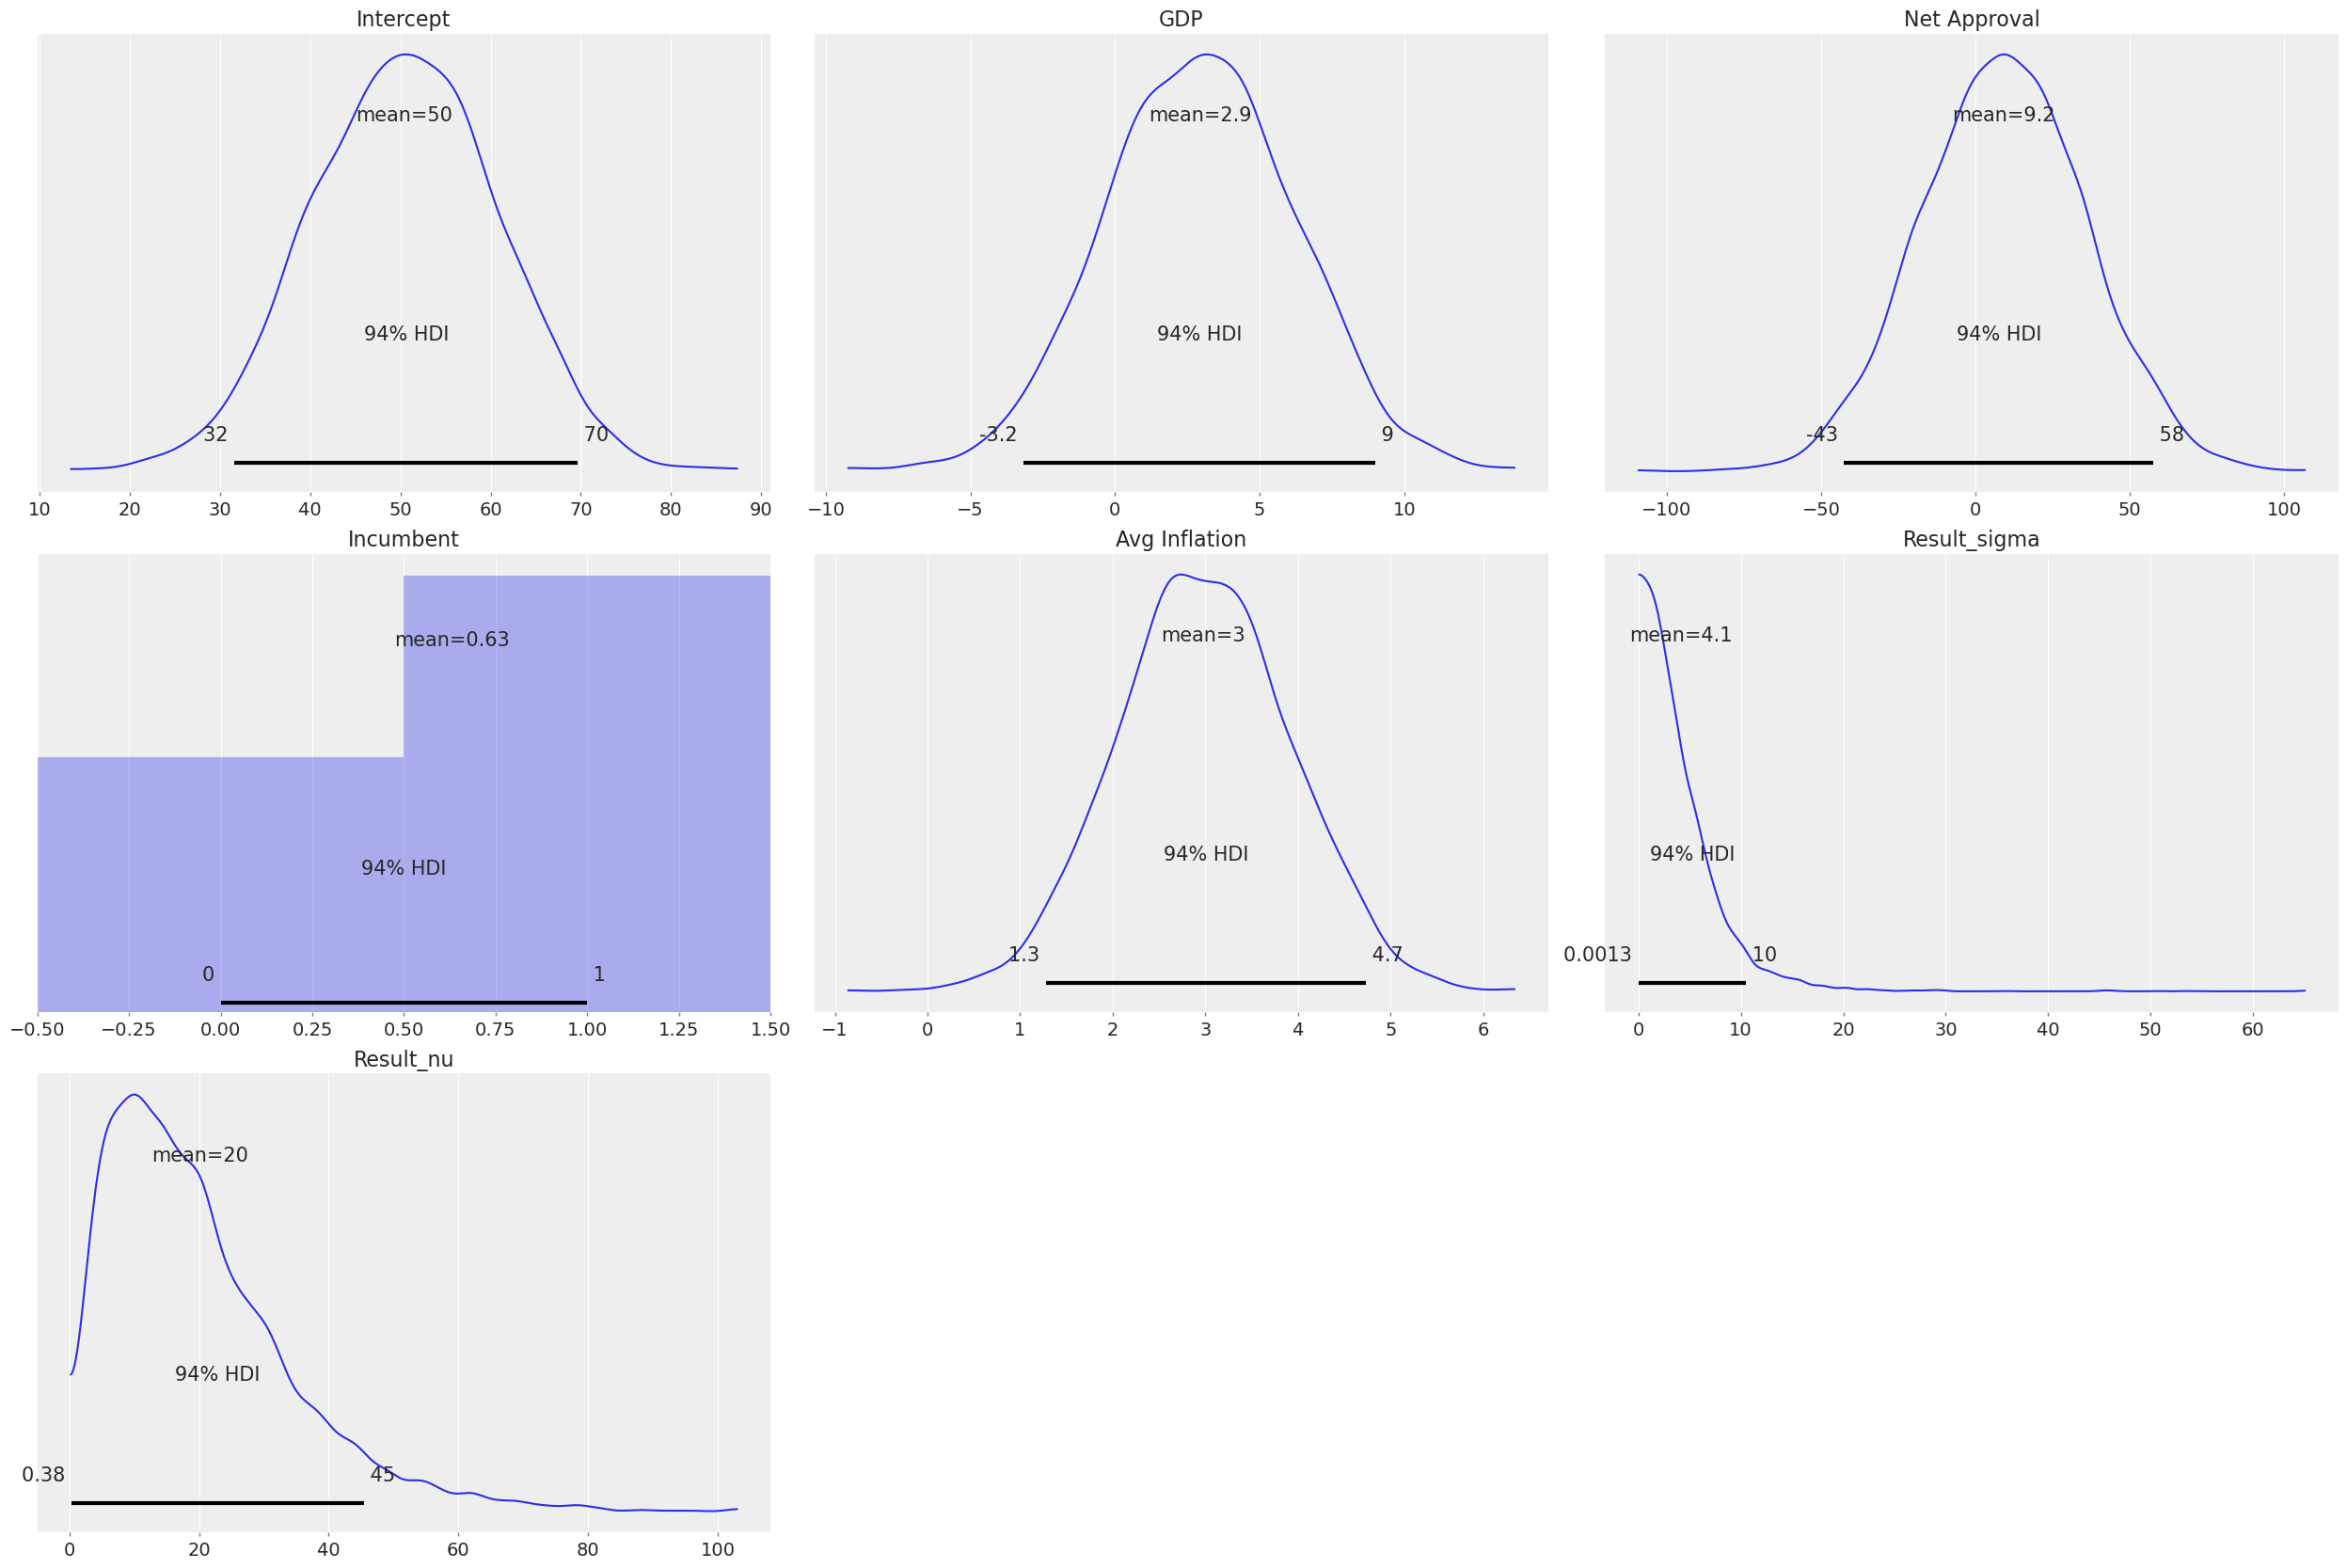

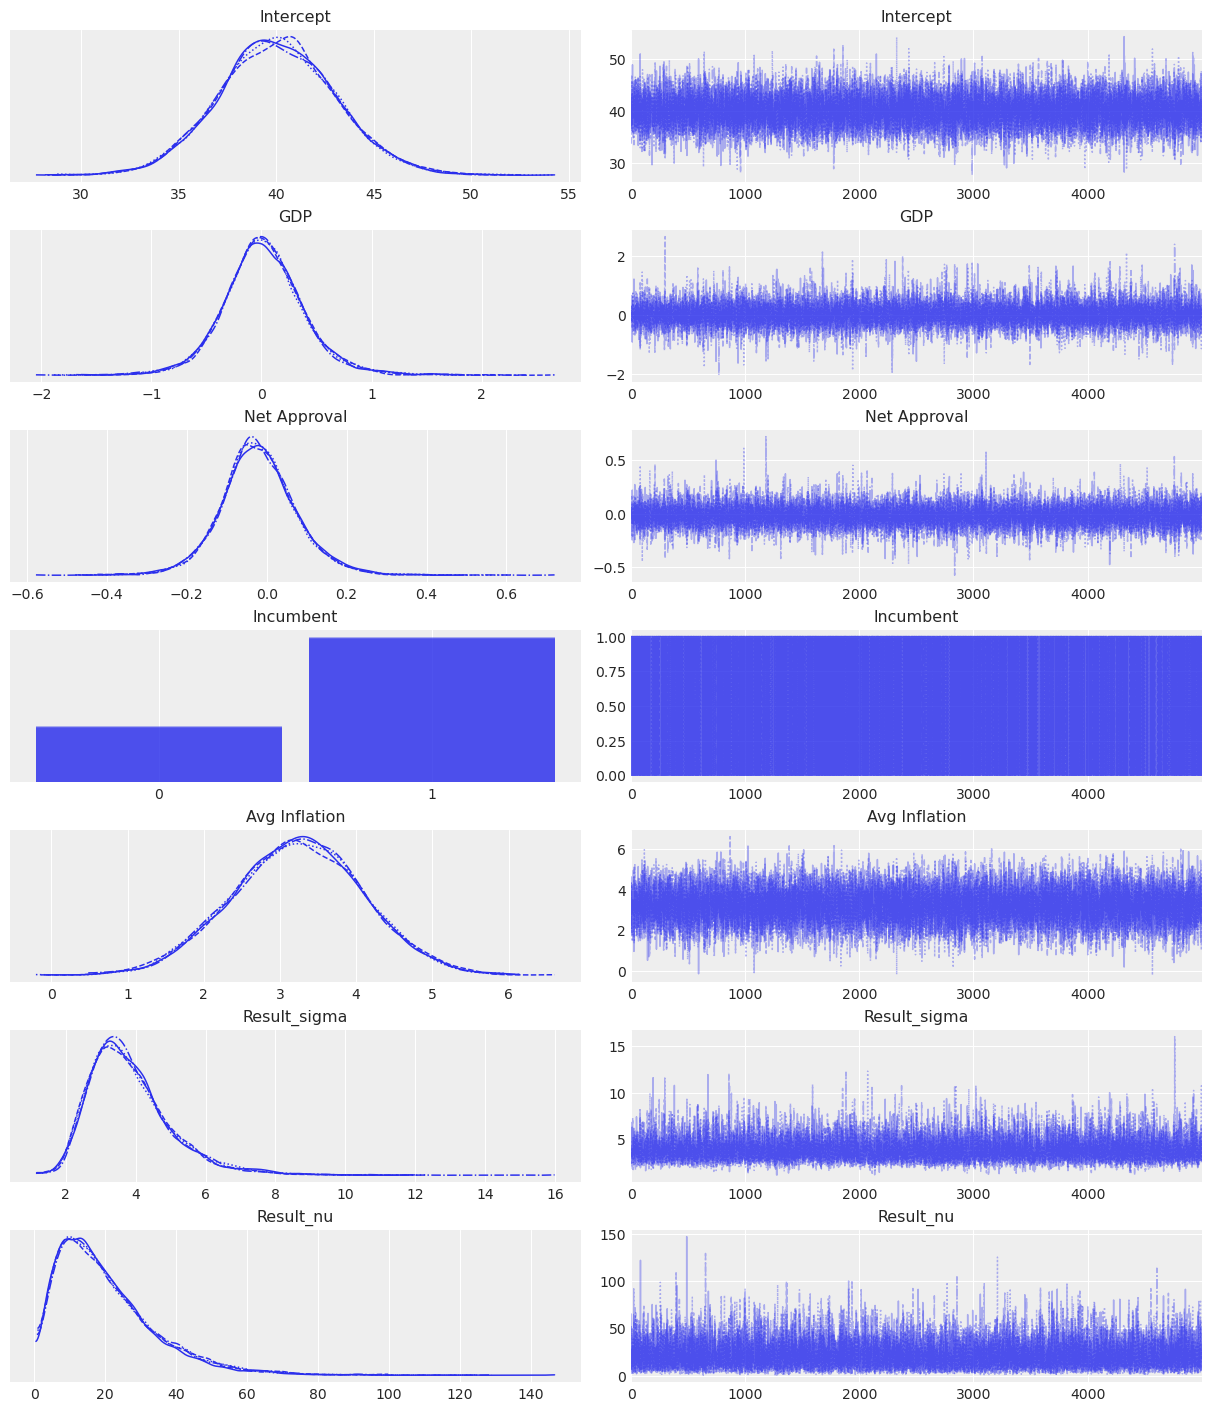

In [13]:
from bambi import Model, Prior
def normal_prior(name):
    return Prior('Normal', mu=compiled_data[name].mean(), sigma=compiled_data[name].std())

inflation_priors = {'Incumbent': Prior('Bernoulli', p=compiled_data['Incumbent'].sum()/len(compiled_data['Incumbent'])),
                    'GDP': normal_prior('GDP'),
                    "Net Approval": normal_prior("Net Approval"),
                    'Avg Inflation': normal_prior('Avg Inflation'),
                    }
#model = Model('p(Result, n) ~ GDP + "Net Approval" + Incumbent', compiled_data, family='binomial')
inflation_model = Model('Result ~ GDP + "Net Approval" + Incumbent + "Avg Inflation"',
                        compiled_data,
                        priors=inflation_priors,
                        dropna=True, family='t')
print(inflation_model)
inflation_model_results = inflation_model.fit(draws=5000)
print(inflation_model_results)
inflation_model.plot_priors()
az.plot_trace(inflation_model_results)
inflation_summary = az.summary(inflation_model_results)
inflation_summary

In [14]:
inflation_means = inflation_summary['mean']
compiled_data['Inflation Prediction'] = inflation_means['Intercept'] + inflation_means['GDP']*compiled_data['GDP'] +inflation_means['Net Approval']*compiled_data['Net Approval'] + inflation_means['Incumbent']*compiled_data['Incumbent']

compiled_data['Inflation Prediction']

1948    40.227124
1950    41.134245
1952    41.392630
1954    39.921970
1956    39.666445
1958    39.353613
1960    39.460222
1962    39.862281
1964    39.661796
1966    40.739293
1968    41.033827
1970    40.270420
1972    40.398359
1974    40.672623
1976    40.071624
1978    40.898641
1980    41.321724
1982    40.791778
1984    40.602931
1986    39.326733
1988    39.973177
1990    39.729668
1992    41.194565
1994    40.922733
1996    40.645045
1998    39.587010
2000    39.842138
2002    39.601780
2004    40.880931
2006    40.592523
2008    40.915983
2010    40.811477
2012    40.799850
2014    40.287492
2016    39.949720
2018    41.113219
2020    40.853241
Name: Inflation Prediction, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
result_not_null = compiled_data[compiled_data['Result'].notnull()]
tfc_mse = mean_squared_error(result_not_null['Result'], result_not_null['Time For Change Prediction'], squared=False)
updated_mse = mean_squared_error(result_not_null['Result'], result_not_null['Inflation Prediction'], squared=False)
print({'Time for Change': tfc_mse, 'Inflation Prediction': updated_mse})

{'Time for Change': 4.773923703903969, 'Inflation Prediction': 12.37113214322769}


Clearly, inflation does not help us predict better using a bayesian linear model.

Not shown here are some manipulations on inflation experimenting to see if they make a better prior.

All are equally bad or worse.


# House percentage (Including Mid-term election results)
Obviously, there are no presidential elections in mid-term years (hence "mid-term"). To overcome this, we will
predict the percentage of house seats won based on the same priors as above.

Formula: "House Incumbent Percent" ~ GDP + "Net Approval" + Incumbent + "Midterm Year"
Family name: Gaussian
Link: identity
Observations: 37
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 55.5585, sigma: 16.5351)
    GDP ~ Normal(mu: 2.9637, sigma: 3.3091)
    Net Approval ~ Normal(mu: 8.8919, sigma: 26.1797)
    Incumbent ~ Bernoulli(p: 0.6486)
    Midterm Year ~ Bernoulli(p: 0.5)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 6.614)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [House Incumbent Percent_sigma, Net Approval, GDP, Intercept]
>BinaryGibbsMetropolis: [Incumbent, Midterm Year]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


mean     sd  hdi_3%  hdi_97%  mcse_mean  \
Intercept                      54.231  1.636  51.248   57.416      0.010   
GDP                             0.119  0.357  -0.550    0.788      0.002   
Net Approval                    0.047  0.045  -0.036    0.136      0.000   
Incumbent                       0.533  0.499   0.000    1.000      0.002   
Midterm Year                    0.449  0.497   0.000    1.000      0.002   
House Incumbent Percent_sigma   6.959  0.857   5.402    8.504      0.006   

                               mcse_sd  ess_bulk  ess_tail  r_hat  
Intercept                        0.007   28144.0   16052.0    1.0  
GDP                              0.002   24718.0   14649.0    1.0  
Net Approval                     0.000   26385.0   15458.0    1.0  
Incumbent                        0.001   59610.0   20000.0    1.0  
Midterm Year                     0.002   51173.0   20000.0    1.0  
House Incumbent Percent_sigma    0.004   22908.0   13970.0    1.0

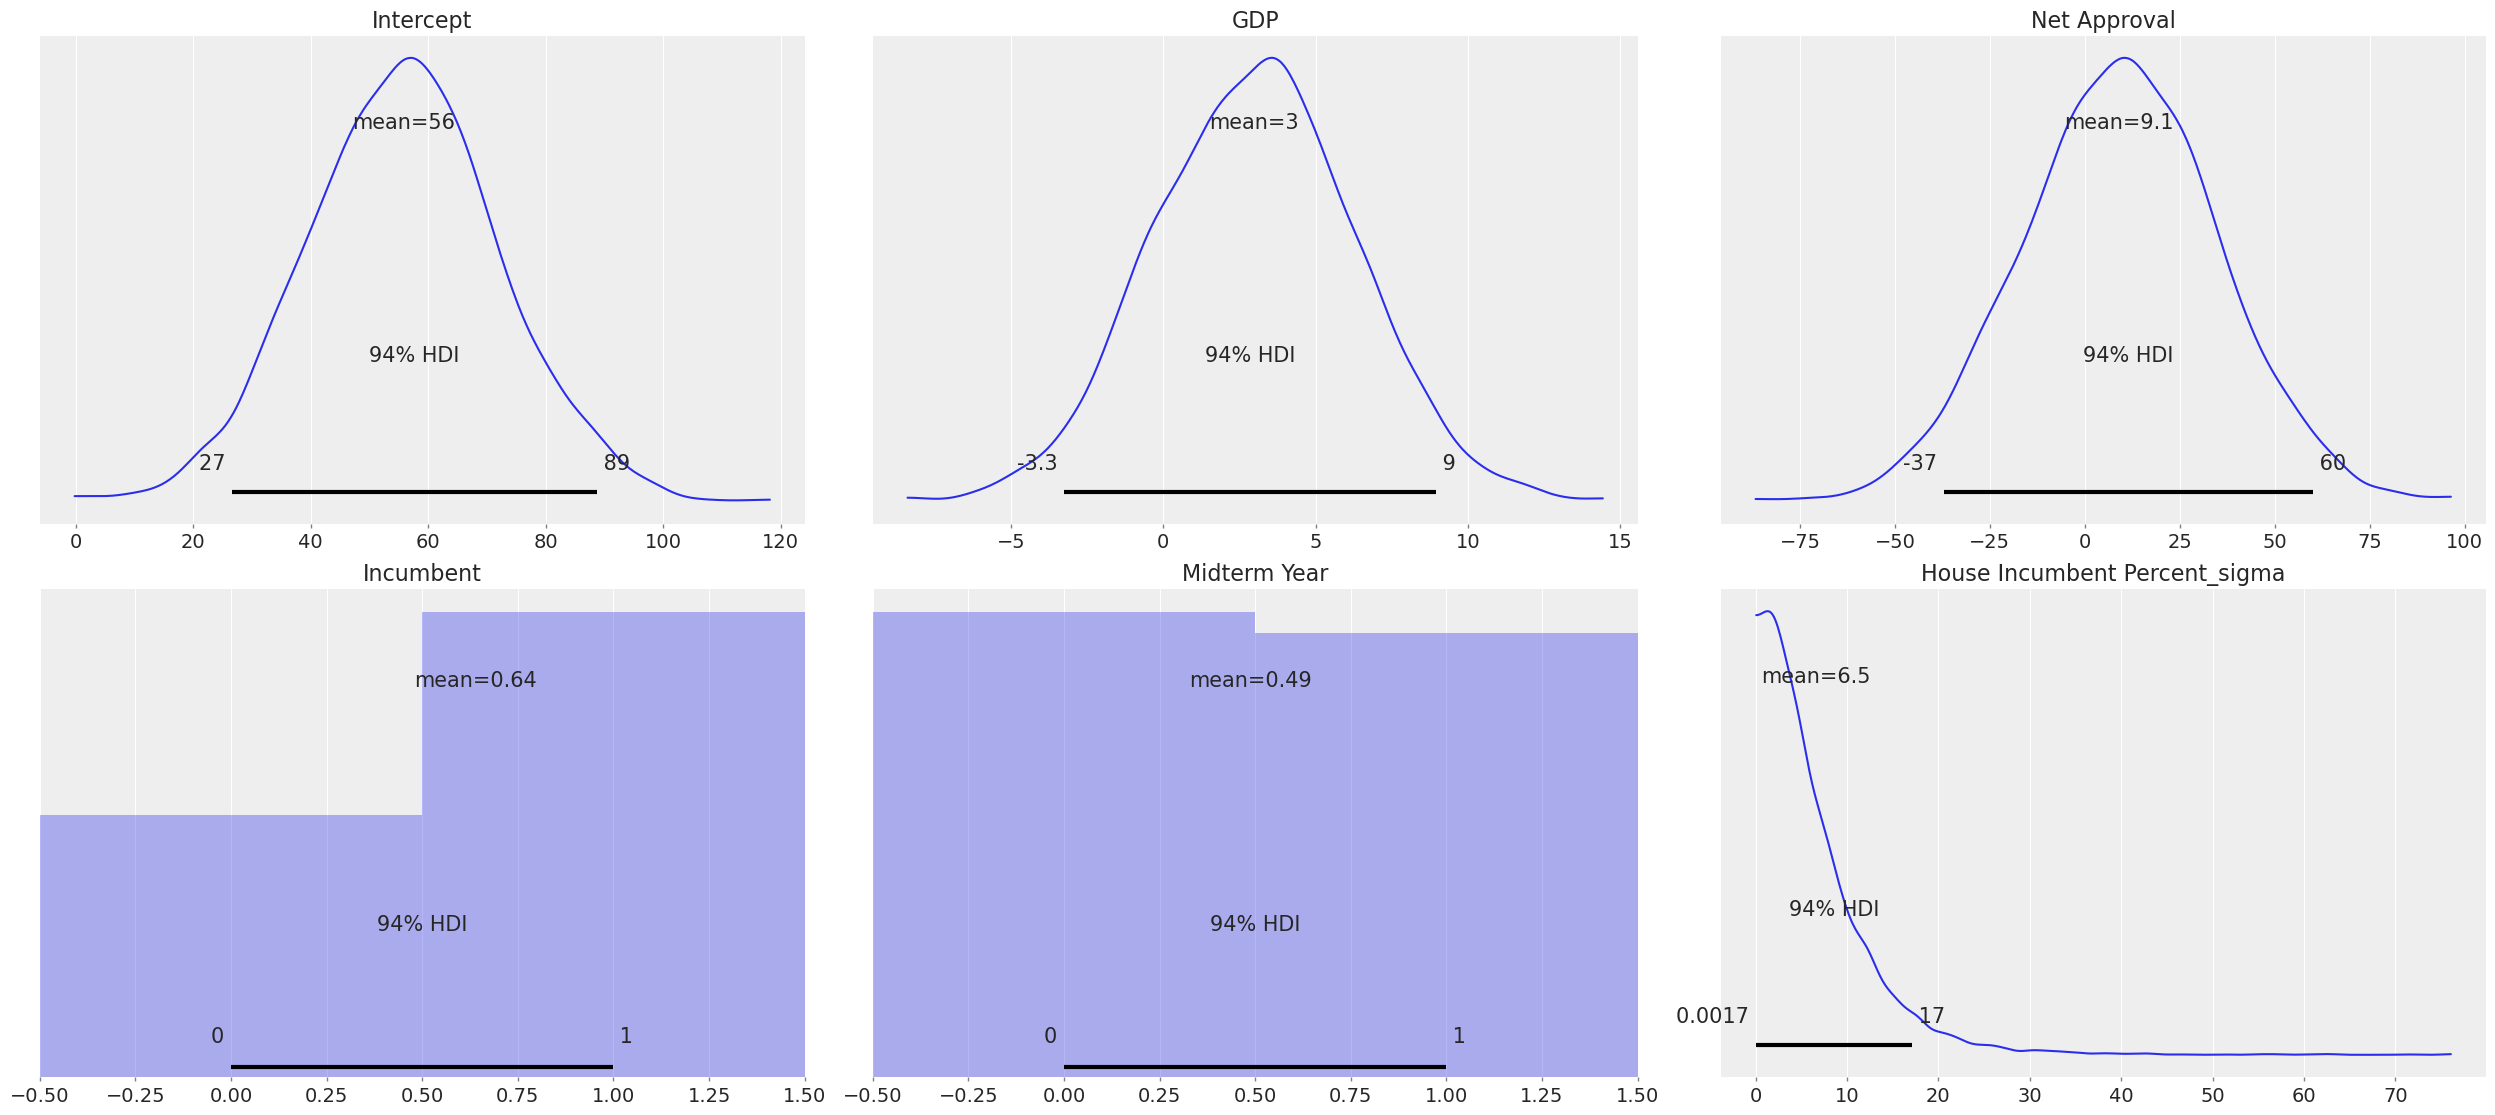

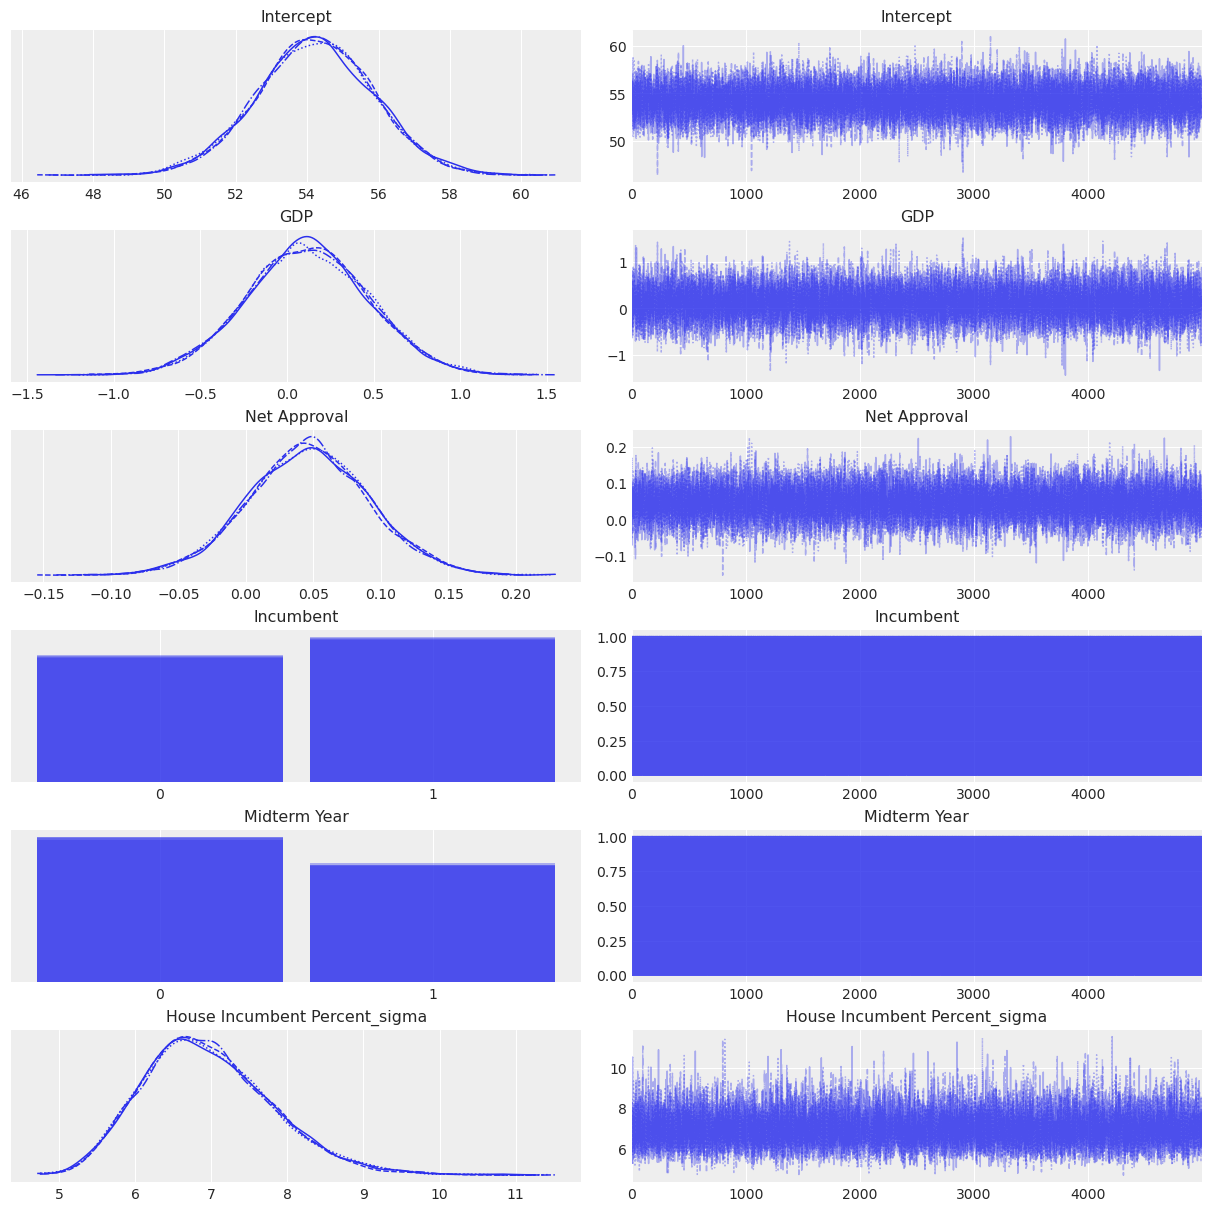

In [16]:
house_tfc_priors = {'Incumbent': Prior('Bernoulli', p=compiled_data['Incumbent'].sum()/len(compiled_data['Incumbent'])),
                    'GDP': normal_prior('GDP'),
                    "Net Approval": normal_prior("Net Approval"),
                    'Midterm Year': Prior('Bernoulli', p=.5),
                    }
#model = Model('p(Result, n) ~ GDP + "Net Approval" + Incumbent', compiled_data, family='binomial')
house_tfc_model = Model('"House Incumbent Percent" ~ GDP + "Net Approval" + Incumbent + "Midterm Year"', compiled_data, priors=house_tfc_priors, dropna=True)
print(house_tfc_model)
house_tfc_model_results = house_tfc_model.fit(draws=5000)
print(house_tfc_model_results)
house_tfc_model.plot_priors()
az.plot_trace(house_tfc_model_results)
house_tfc_summary = az.summary(house_tfc_model_results)
house_tfc_summary

In [17]:
house_tfc_means = house_tfc_summary['mean']
compiled_data['House TFC Learned Prediction'] = house_tfc_means['Intercept'] + house_tfc_means['GDP']*compiled_data['GDP'] +house_tfc_means['Net Approval']*compiled_data['Net Approval'] + house_tfc_means['Incumbent']*compiled_data['Incumbent']

compiled_data['House TFC Learned Prediction'].head()

1948    54.587701
1950    55.162386
1952    53.970569
1954    56.260829
1956    57.634856
Name: House TFC Learned Prediction, dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error
naive_house_tfc_mse = mean_squared_error(compiled_data['House Incumbent Percent'], compiled_data['Time For Change Prediction'], squared=False)
learned_house_tfc_mse = mean_squared_error(compiled_data['House Incumbent Percent'], compiled_data['House TFC Learned Prediction'], squared=False)
print({'Naive House Time for Change': naive_house_tfc_mse, 'Learned House Time for Change': learned_house_tfc_mse})

{'Naive House Time for Change': 8.071985667277522, 'Learned House Time for Change': 6.5231107219854625}


Our learned house model is definitely more accurate than just the naive House Time for Change model,
but its mean squared error is half as good as our presidential model's.

That being said, the US House election is not one singular, popular vote election in the
same sense as the computation of the US President Popular Vote.
I suspect we could jointly train 435 separate models (one for each house district) and get
fairly accurate predictions in each.

The only problem with that is that I need A LOT more district-level data from a lot more years.
This also needs a way to generalize the model between decades, since house districts are different
everytime redistricting occurs.

As a Proof of concept, I guess I could just use data from every house election between 2012-2020.

# House district model

In [129]:
import pandas as pd
from time_for_change_data import load_congressional_time_for_change_data
congressional_district_data = load_congressional_time_for_change_data()

In [20]:
from bambi import Model, Prior
def normal_prior(name):
    return Prior('Normal', mu=congressional_district_data[name].mean(), sigma=congressional_district_data[name].std())
def bernoulli_prior(name):
    return Prior('Bernoulli', p=congressional_district_data[name].sum()/len(congressional_district_data[name]))

congressional_district_data_priors = {'Incumbent': bernoulli_prior('Incumbent'),
                    'GDP': normal_prior('GDP'),
                    "Net Approval": normal_prior("Net Approval"),
                    'PartiesMatch': bernoulli_prior('PartiesMatch')
                    }
#model = Model('p(Result, n) ~ GDP + "Net Approval" + Incumbent', compiled_data, family='binomial')
house_district_model = Model('IncumbentResult ~ GDP + ((Incumbent + "Net Approval") * PartiesMatch)',
                             congressional_district_data,
                             # priors=congressional_district_data_priors,
                             dropna=True,
                             family='t')
print(house_district_model)
house_district_model_results = house_district_model.fit(draws=3000)
print(house_district_model_results)


Automatically removing 294/4350 rows from the dataset.


Formula: IncumbentResult ~ GDP + ((Incumbent + "Net Approval") * PartiesMatch)
Family name: T
Link: identity
Observations: 4056
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 64.8772, sigma: 57.7506)
    GDP ~ Normal(mu: 0.0, sigma: 7.7581)
    Incumbent ~ Normal(mu: 0.0, sigma: 57.9584)
    Net Approval ~ Normal(mu: 0.0, sigma: 1.2174)
    PartiesMatch ~ Normal(mu: 0.0, sigma: 56.8203)
    Incumbent:PartiesMatch ~ Normal(mu: 0.0, sigma: 61.2799)
    Net Approval:PartiesMatch ~ Normal(mu: 0.0, sigma: 1.6744)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 11.3628)
    nu ~ Gamma(alpha: 2, beta: 0.1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [IncumbentResult_nu, IncumbentResult_sigma, Net Approval:PartiesMatch, Incumbent:PartiesMatch, PartiesMatch, Net Approval, Incumbent, GDP, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 35 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                  66.228  0.429  65.423   67.030      0.005    0.004   
GDP                         0.011  0.048  -0.075    0.103      0.000    0.000   
Incumbent                  -0.317  0.541  -1.316    0.696      0.006    0.005   
Net Approval               -0.027  0.012  -0.049   -0.005      0.000    0.000   
PartiesMatch               -1.676  0.598  -2.758   -0.517      0.007    0.005   
Incumbent:PartiesMatch     -2.155  0.772  -3.631   -0.746      0.009    0.007   
Net Approval:PartiesMatch   0.153  0.016   0.121    0.182      0.000    0.000   
IncumbentResult_sigma       9.595  0.202   9.224    9.990      0.002    0.002   
IncumbentResult_nu          8.031  1.139   6.111   10.224      0.013    0.009   

                           ess_bulk  ess_tail  r_hat  
Intercept                    7384.0    8909.0    1.0  
GDP                         12432.0    7333.0    1.0  
Incumbent                    7269.0    8271.0    1.0  
Net Approval                 8697.0    8455.0    1.0  
PartiesMatch                 7335.0    8597.0    1.0  
Incumbent:PartiesMatch       6981.0    8141.0    1.0  
Net Approval:PartiesMatch    8035.0    8605.0    1.0  
IncumbentResult_sigma        8367.0    8614.0    1.0  
IncumbentResult_nu           8320.0    7772.0    1.0

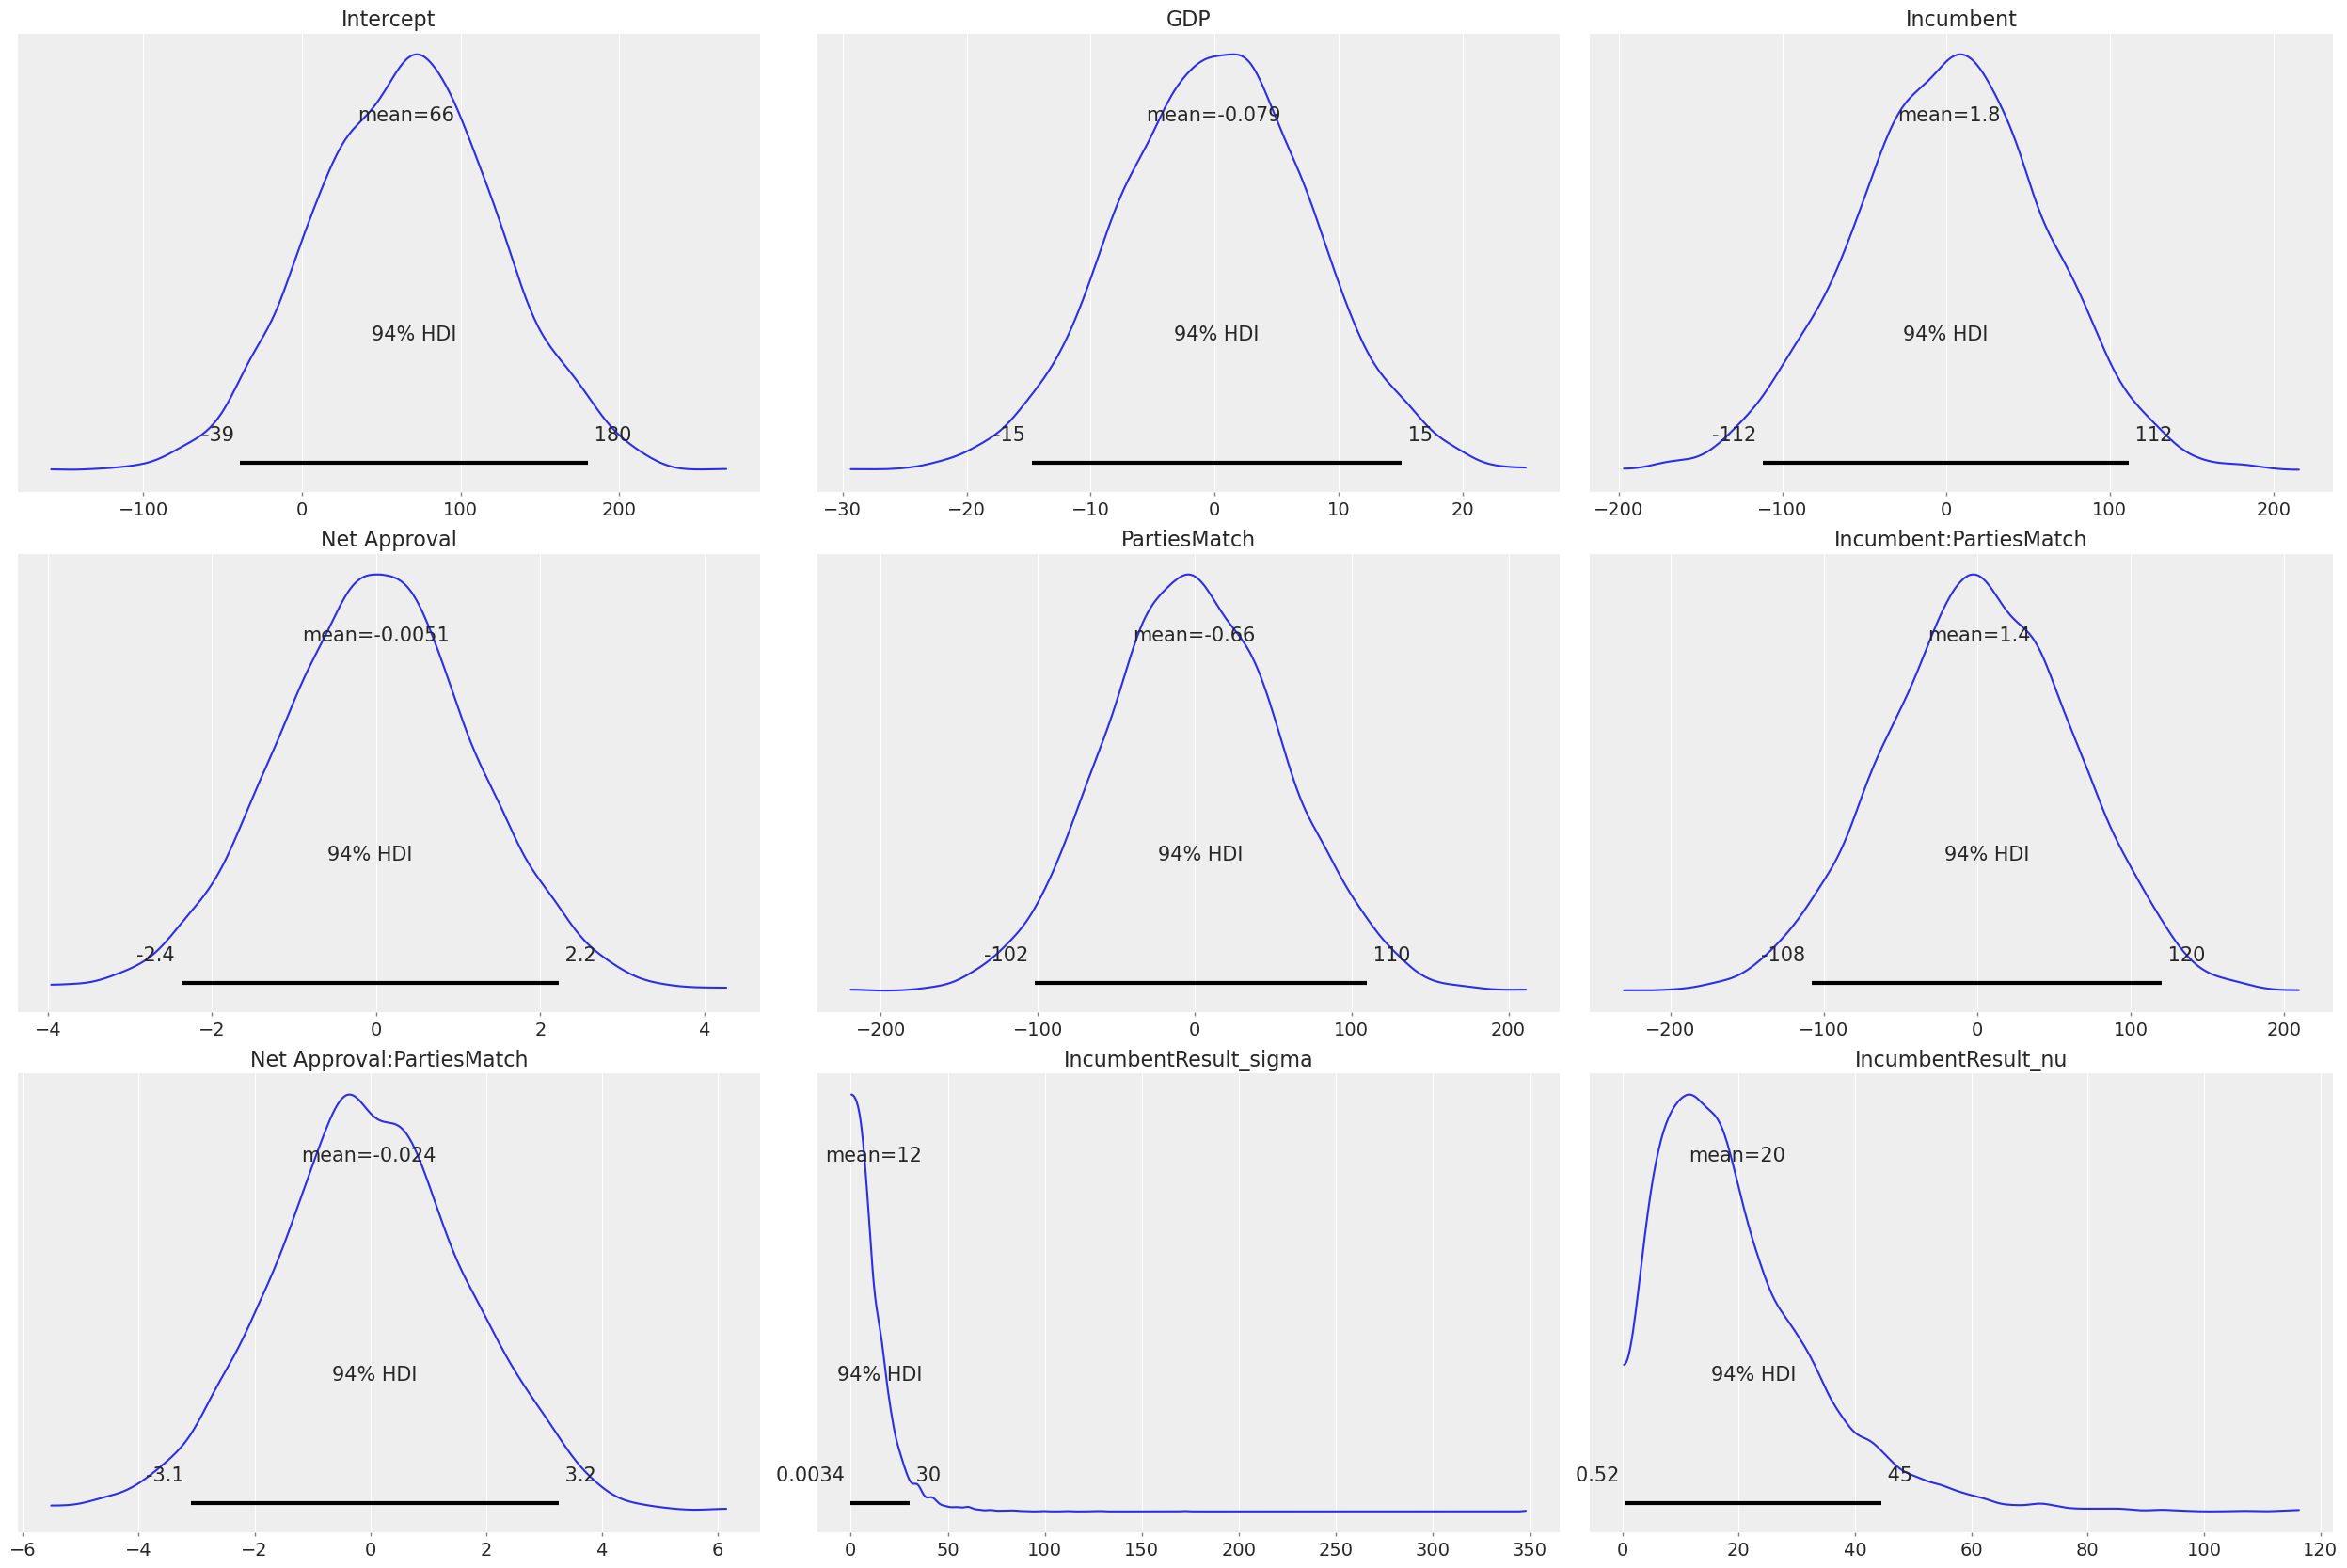

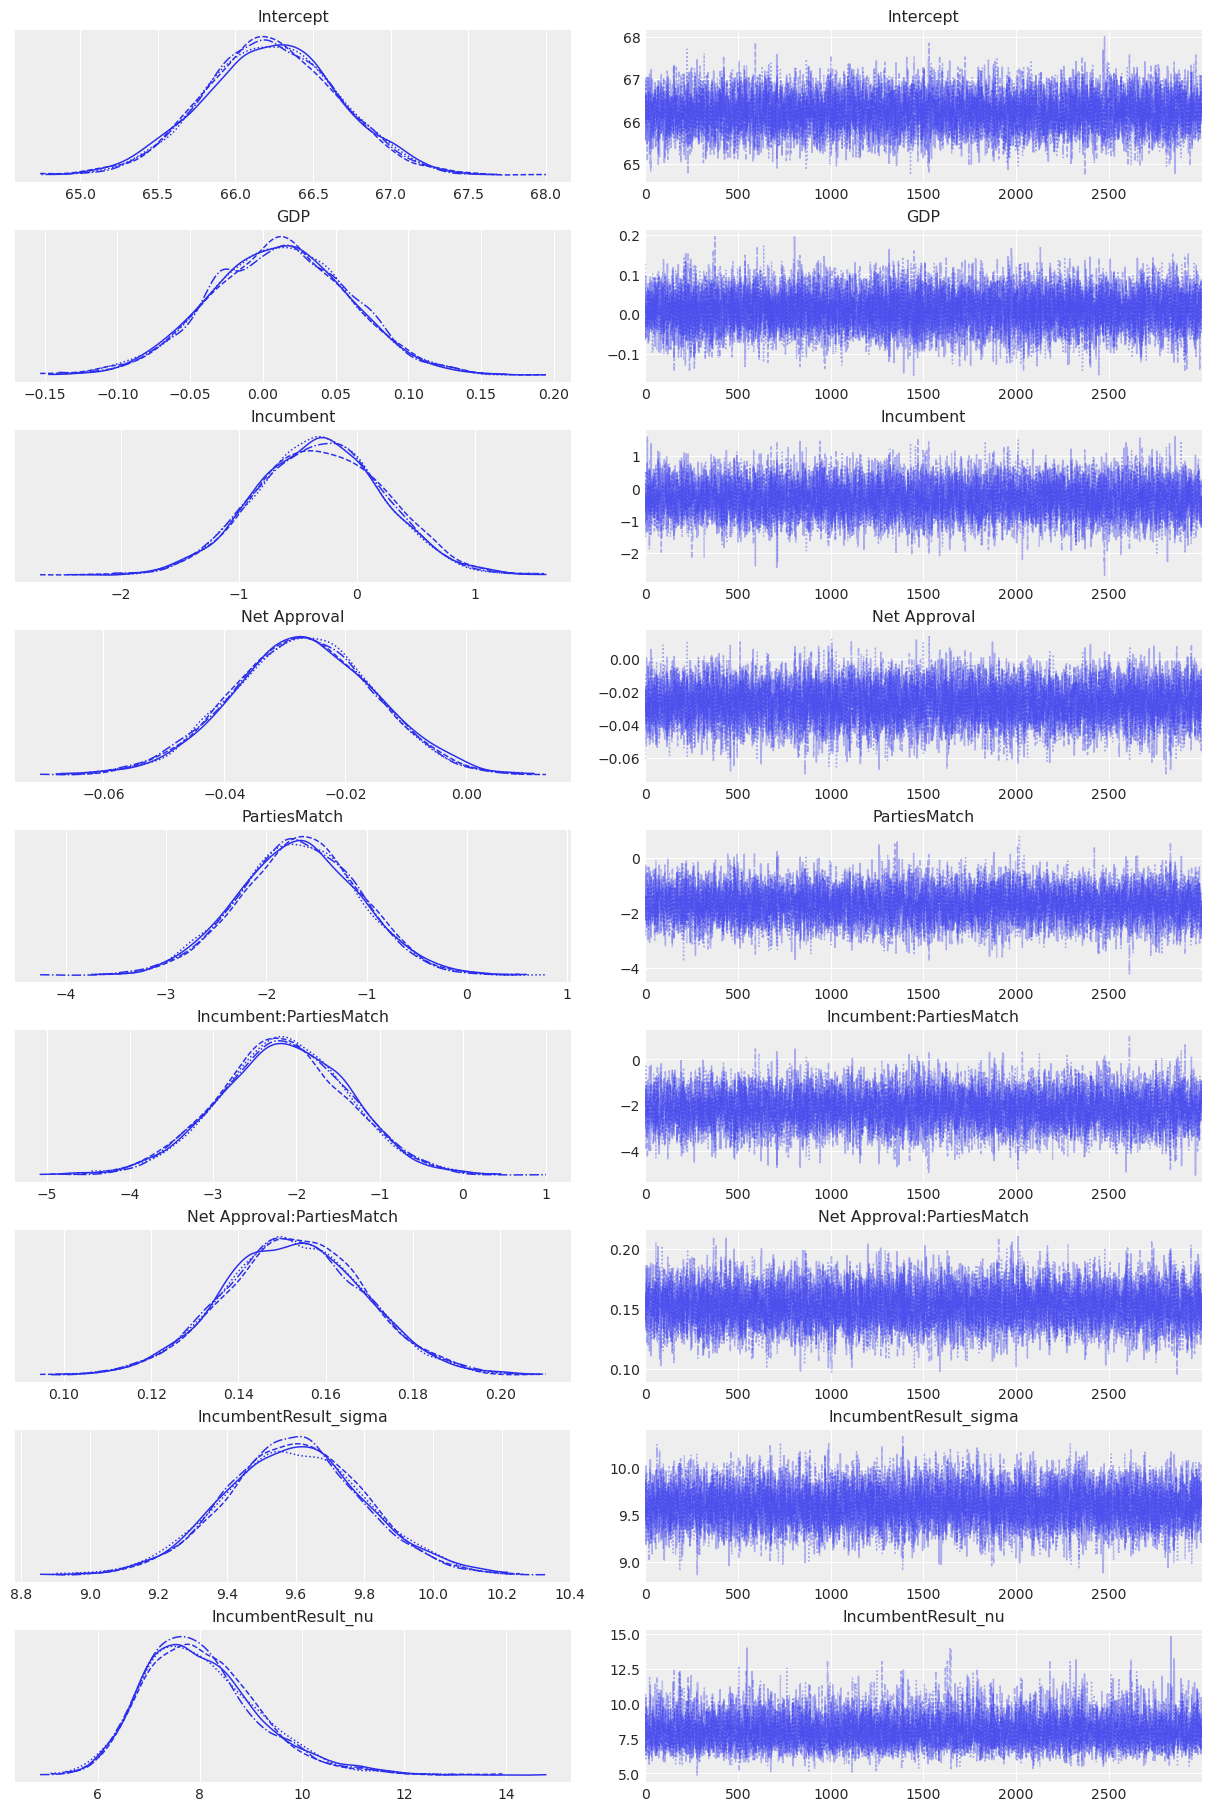

In [21]:
import arviz as az
az.style.use('arviz-darkgrid')
house_district_model.plot_priors()
az.plot_trace(house_district_model_results)
house_district_model_summary = az.summary(house_district_model_results)
house_district_model_summary

In [22]:
house_district_model_results


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

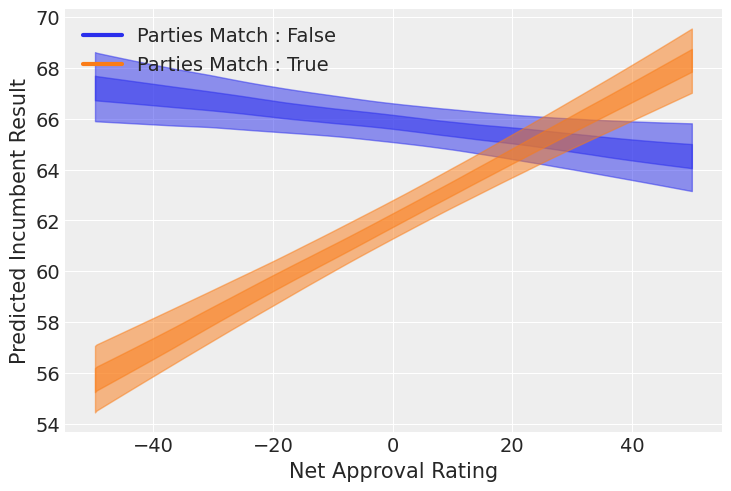

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

APPROVAL = np.linspace(-50, 50)


fig, ax = plt.subplots()
handles = []


for i in range(2):
    color = f"C{i}"
    label = f"Parties Match : {bool(i)}"
    handles.append(mlines.Line2D([], [], color=color, label=label, lw=3))

    new_data = pd.DataFrame({
           'GDP': np.ones_like(APPROVAL) * (congressional_district_data['GDP'].mean()-6),
           'Incumbent': np.ones_like(APPROVAL) * 1,
           'Net Approval': APPROVAL,
           'PartiesMatch': np.ones_like(APPROVAL) * i
    })
    new_idata_house = house_district_model.predict(house_district_model_results, data=new_data, inplace=False)
    mean = new_idata_house.posterior["IncumbentResult_mean"].values

    az.plot_hdi(APPROVAL, mean, ax=ax, color=color)
    az.plot_hdi(APPROVAL, mean, ax=ax, color=color, hdi_prob=0.5)

ax.set_xlabel("Net Approval Rating")
ax.set_ylabel("Predicted Incumbent Result")
ax.legend(handles=handles, loc="upper left")

In [24]:
def predict_bambi_model(model: Model, model_results, result_string: str, data: pd.DataFrame):
    prediction_object = model.predict(model_results, data=data, inplace=False)
    return pd.DataFrame(prediction_object.posterior[result_string].values.mean(axis=(0,1)), index=data.index)


In [25]:
congressional_district_data['HouseIncumbentPredictions'] = predict_bambi_model(house_district_model, house_district_model_results, 'IncumbentResult_mean', congressional_district_data)
congressional_district_data['HouseIncumbentPredictions']

0       69.253780
1       69.253780
2       69.253780
3       69.253780
4       64.381958
          ...    
4345    60.345148
4346    60.345148
4347    60.345148
4348    60.345148
4349    60.345148
Name: HouseIncumbentPredictions, Length: 4350, dtype: float64

In [114]:
congressional_district_data

PVI           Location       Party  IncumbentResult  Year  Republican  \
0      NaN    2002-Alabama-01  Republican             60.5  2002        60.5   
1      NaN    2002-Alabama-02  Republican             68.8  2002        68.8   
2      NaN    2002-Alabama-03  Republican             50.3  2002        50.3   
3      NaN    2002-Alabama-04  Republican             86.7  2002        86.7   
4      NaN    2002-Alabama-05  Democratic             73.3  2002        24.7   
...    ...                ...         ...              ...   ...         ...   
4345  13.0  2020-Wisconsin-05  Republican             60.1  2020        60.1   
4346   8.0  2020-Wisconsin-06  Republican             59.2  2020        59.2   
4347   8.0  2020-Wisconsin-07  Republican             60.7  2020        60.7   
4348   7.0  2020-Wisconsin-08  Republican             64.2  2020        64.2   
4349  25.0    2020-Wyoming-00  Republican             68.6  2020        68.6   

      TimeInOffice  PreviousRepublican      GDP  Net Approval  Incumbent  \
0               18                 NaN  1.32288            57          1   
1               10                 NaN  1.32288            57          1   
2                6                 NaN  1.32288            57          1   
3                6                 NaN  1.32288            57          1   
4               12                 NaN  1.32288            57          1   
...            ...                 ...      ...           ...        ...   
4345            42                62.0 -9.08374           -13          1   
4346             6                55.5 -9.08374           -13          1   
4347             0                59.9 -9.08374           -13          1   
4348             4                63.7 -9.08374           -13          1   
4349             4                63.7 -9.08374           -13          1   

      Midterm Year PresidentIncumbentParty  Time For Change Prediction  \
0                1              Republican                   58.447324   
1                1              Republican                   58.447324   
2                1              Republican                   58.447324   
3                1              Republican                   58.447324   
4                1              Republican                   58.447324   
...            ...                     ...                         ...   
4345             0              Republican                   45.236529   
4346             0              Republican                   45.236529   
4347             0              Republican                   45.236529   
4348             0              Republican                   45.236529   
4349             0              Republican                   45.236529   

      Republican TFC  PartiesMatch  HouseIncumbentWon  
0          58.447324          True               True  
1          58.447324          True               True  
2          58.447324          True               True  
3          58.447324          True               True  
4          58.447324         False               True  
...              ...           ...                ...  
4345       45.236529          True               True  
4346       45.236529          True               True  
4347       45.236529          True               True  
4348       45.236529          True               True  
4349       45.236529          True               True  

[4350 rows x 17 columns]

In [27]:
# RMSE of this new model
from sklearn.metrics import mean_squared_error
def rmse(data, column1name, column2name):
    combined = data[[column1name, column2name]].dropna(axis='index')
    return  mean_squared_error(combined[column1name], combined[column2name], squared=False)

print('Improved House', rmse(congressional_district_data, 'IncumbentResult', 'HouseIncumbentPredictions'))

Improved House 11.040647247411261


Automatically removing 1939/4350 rows from the dataset.


Formula: IncumbentResult ~ GDP + Incumbent + "Net Approval" + "PresidentIncumbentParty":PVI + Party:PVI
Family name: T
Link: identity
Observations: 2411
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 64.1206, sigma: 52.598)
    GDP ~ Normal(mu: 0.0, sigma: 6.3774)
    Incumbent ~ Normal(mu: 0.0, sigma: 57.54)
    Net Approval ~ Normal(mu: 0.0, sigma: 2.9558)
    PresidentIncumbentParty:PVI ~ Normal(mu: [0. 0.], sigma: [2.7806 2.5828])
    Party:PVI ~ Normal(mu: 0.0, sigma: 3.809)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 11.4983)
    nu ~ Gamma(alpha: 2, beta: 0.1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [IncumbentResult_nu, IncumbentResult_sigma, Party:PVI, PresidentIncumbentParty:PVI, Net Approval, Incumbent, GDP, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 25 seconds.


mean     sd  hdi_3%  hdi_97%  \
Intercept                                54.982  0.250  54.541   55.480   
GDP                                      -0.002  0.025  -0.050    0.045   
Incumbent                                -2.262  0.249  -2.705   -1.779   
Net Approval                              0.012  0.013  -0.011    0.036   
PresidentIncumbentParty:PVI[Democratic]  -0.836  0.015  -0.864   -0.809   
PresidentIncumbentParty:PVI[Republican]  -0.974  0.015  -1.002   -0.948   
Party:PVI[Republican]                     1.708  0.026   1.660    1.756   
IncumbentResult_sigma                     4.552  0.120   4.332    4.777   
IncumbentResult_nu                        2.908  0.191   2.549    3.257   

                                         mcse_mean  mcse_sd  ess_bulk  \
Intercept                                    0.002    0.002   12694.0   
GDP                                          0.000    0.000   13837.0   
Incumbent                                    0.002    0.002   13532.0   
Net Approval                                 0.000    0.000   14623.0   
PresidentIncumbentParty:PVI[Democratic]      0.000    0.000   11259.0   
PresidentIncumbentParty:PVI[Republican]      0.000    0.000   11043.0   
Party:PVI[Republican]                        0.000    0.000   10388.0   
IncumbentResult_sigma                        0.001    0.001   12704.0   
IncumbentResult_nu                           0.002    0.001   11828.0   

                                         ess_tail  r_hat  
Intercept                                  9575.0    1.0  
GDP                                        9775.0    1.0  
Incumbent                                  9431.0    1.0  
Net Approval                               9386.0    1.0  
PresidentIncumbentParty:PVI[Democratic]    9332.0    1.0  
PresidentIncumbentParty:PVI[Republican]    9824.0    1.0  
Party:PVI[Republican]                      9269.0    1.0  
IncumbentResult_sigma                      9271.0    1.0  
IncumbentResult_nu                         9238.0    1.0

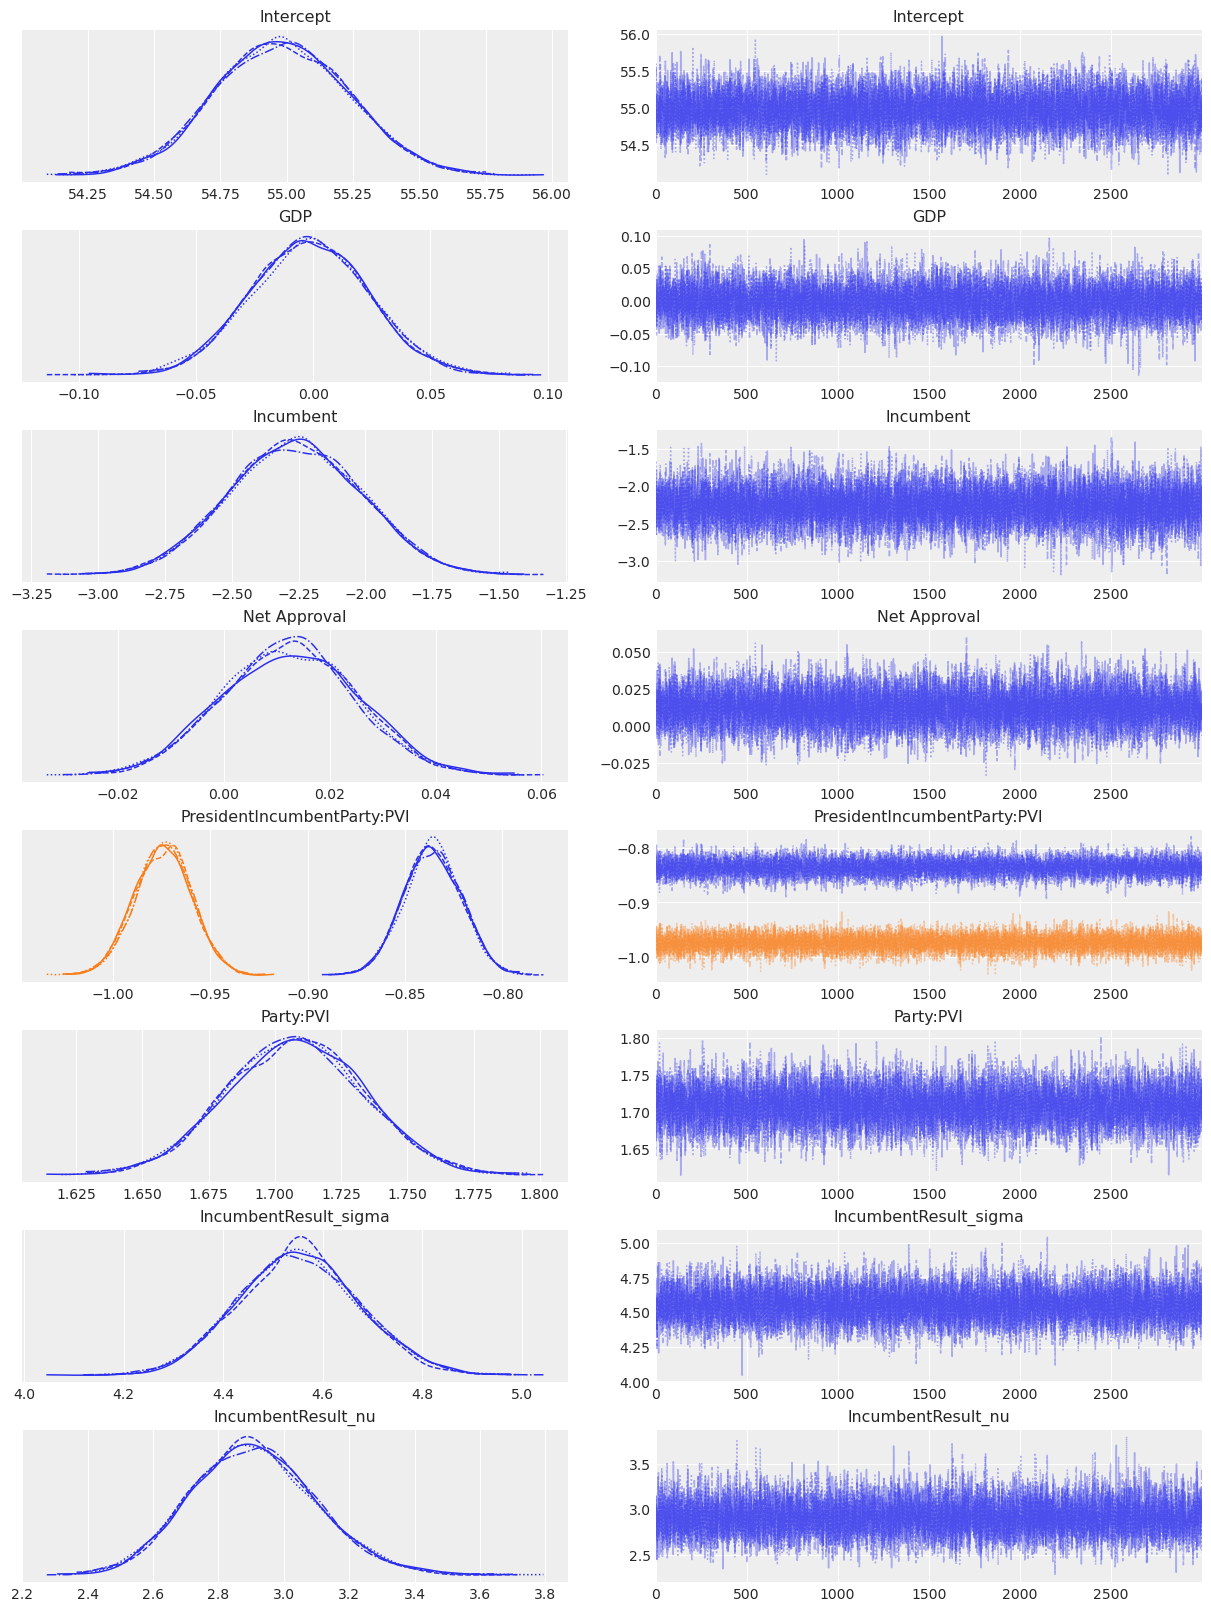

In [28]:
# Incorporate PVI
house_pvi_model = Model('IncumbentResult ~ GDP + Incumbent + "Net Approval" + "PresidentIncumbentParty":PVI + Party:PVI',
                        congressional_district_data,
                        # priors=congressional_district_data_priors,
                        dropna=True,
                        family='t')
print(house_pvi_model)
house_pvi_model_results = house_pvi_model.fit(draws=3000)
#house_pvi_model.plot_priors()
az.plot_trace(house_pvi_model_results)
house_pvi_model_summary = az.summary(house_pvi_model_results)
house_pvi_model_summary

In [29]:
congressional_district_data['HousePVIPredictions'] = predict_bambi_model(house_pvi_model, house_pvi_model_results, 'IncumbentResult_mean', congressional_district_data)
congressional_district_data['HousePVIPredictions']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4345    62.111393
4346    58.443305
4347    58.443305
4348    57.709688
4349    70.914803
Name: HousePVIPredictions, Length: 4350, dtype: float64

In [30]:
congressional_district_data['Party'].value_counts()

Republican    2190
Democratic    2079
Name: Party, dtype: int64

In [31]:
print('PVI House', rmse(congressional_district_data, 'IncumbentResult', 'HousePVIPredictions'))

PVI House 7.607361601149228


Automatically removing 1939/4350 rows from the dataset.


Formula: p({prob_to_count(IncumbentResult)}, 1000) ~ GDP + Incumbent + "Net Approval" + "PresidentIncumbentParty":PVI + Party:PVI
Family name: Binomial
Link: logit
Observations: 2411
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 4.5744)
    GDP ~ Normal(mu: 0.0, sigma: 0.5546)
    Incumbent ~ Normal(mu: 0.0, sigma: 5.0042)
    Net Approval ~ Normal(mu: 0.0, sigma: 0.2571)
    PresidentIncumbentParty:PVI ~ Normal(mu: [0. 0.], sigma: [0.2418 0.2246])
    Party:PVI ~ Normal(mu: 0.0, sigma: 0.3313)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Party:PVI, PresidentIncumbentParty:PVI, Net Approval, Incumbent, GDP, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)

The default initialization using init='auto' has failed, trying to recover by switching to init='adapt_diag'
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Party:PVI, PresidentIncumbentParty:PVI, Net Approval, Incumbent, GDP, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


mean     sd  hdi_3%  hdi_97%  \
Intercept                                0.255  0.003   0.249    0.261   
GDP                                     -0.002  0.000  -0.002   -0.001   
Incumbent                               -0.131  0.003  -0.137   -0.126   
Net Approval                             0.002  0.000   0.002    0.002   
PresidentIncumbentParty:PVI[Democratic] -0.037  0.000  -0.038   -0.037   
PresidentIncumbentParty:PVI[Republican] -0.045  0.000  -0.045   -0.045   
Party:PVI[Republican]                    0.076  0.000   0.076    0.077   

                                         mcse_mean  mcse_sd  ess_bulk  \
Intercept                                      0.0      0.0    3435.0   
GDP                                            0.0      0.0    3995.0   
Incumbent                                      0.0      0.0    3920.0   
Net Approval                                   0.0      0.0    4072.0   
PresidentIncumbentParty:PVI[Democratic]        0.0      0.0    3227.0   
PresidentIncumbentParty:PVI[Republican]        0.0      0.0    3126.0   
Party:PVI[Republican]                          0.0      0.0    2890.0   

                                         ess_tail  r_hat  
Intercept                                  3192.0    1.0  
GDP                                        3350.0    1.0  
Incumbent                                  3359.0    1.0  
Net Approval                               3202.0    1.0  
PresidentIncumbentParty:PVI[Democratic]    2686.0    1.0  
PresidentIncumbentParty:PVI[Republican]    2838.0    1.0  
Party:PVI[Republican]                      2773.0    1.0

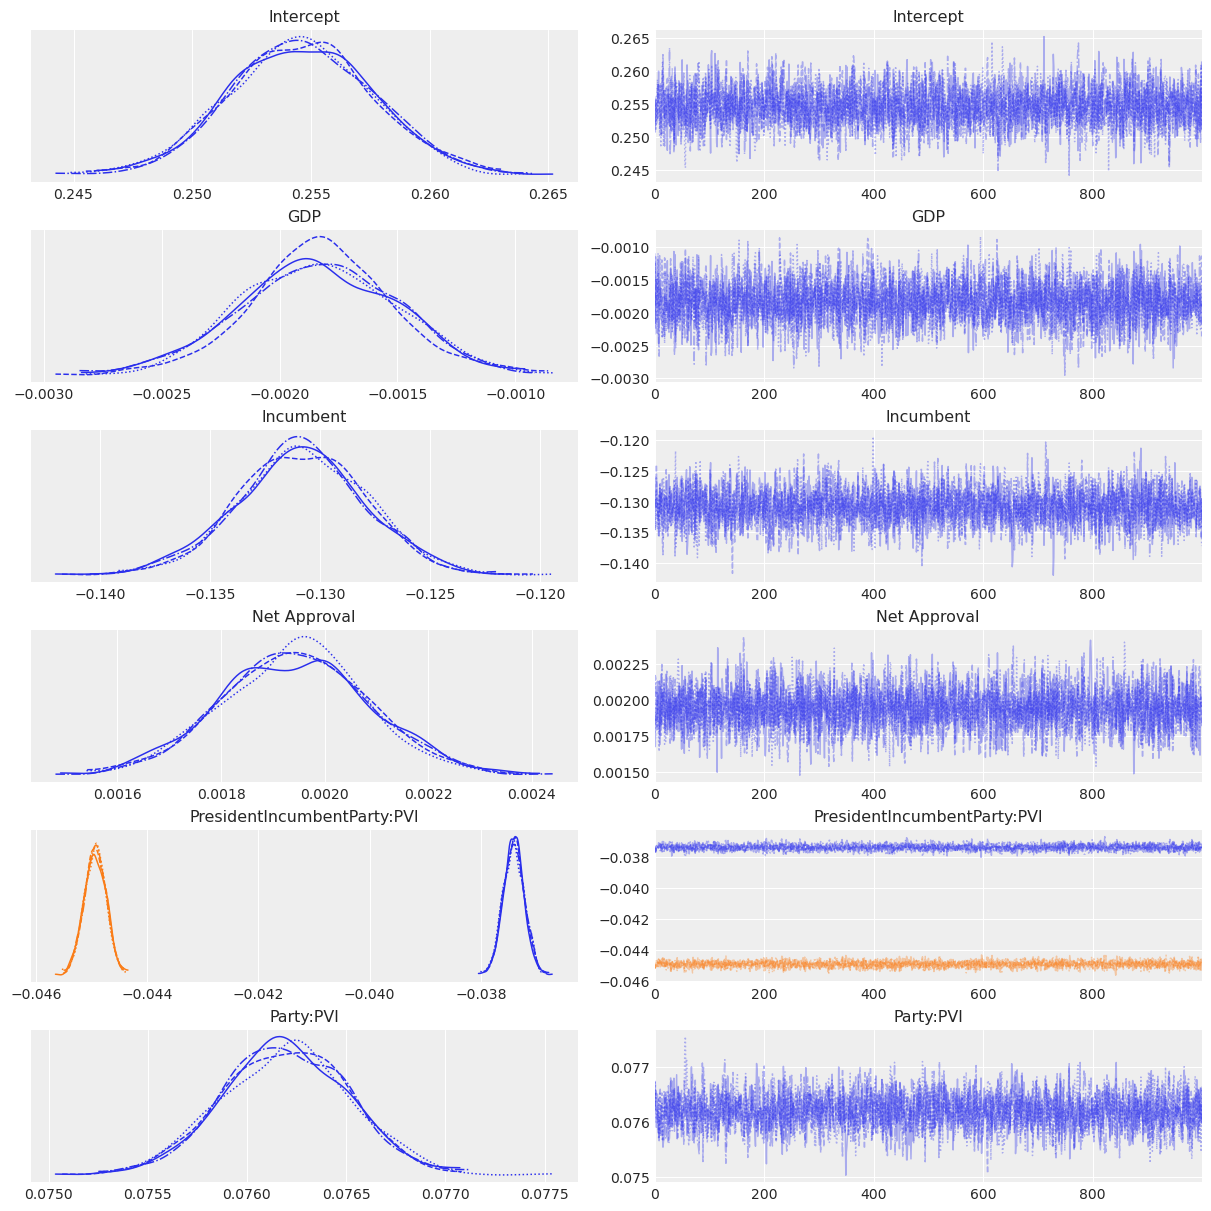

In [32]:
# Binomial PVI Model
def prob_to_count(res):
    return round(10*res)

pvi_binomial_model = Model('p({prob_to_count(IncumbentResult)}, 1000) ~ GDP + Incumbent + "Net Approval" + "PresidentIncumbentParty":PVI + Party:PVI',
                           congressional_district_data,
                           family='binomial',
                           dropna=True)
print(pvi_binomial_model)
pvi_binomial_model_results = pvi_binomial_model.fit()

#house_pvi_model.plot_priors()
az.plot_trace(pvi_binomial_model_results)
pvi_binomial_model_summary = az.summary(pvi_binomial_model_results)
pvi_binomial_model_summary

In [33]:
congressional_district_data['HousePVIBinomialPredictions'] = 100 * predict_bambi_model(pvi_binomial_model, pvi_binomial_model_results, 'p(I(prob_to_count(IncumbentResult)), 1000)_mean', congressional_district_data)
print(congressional_district_data['HousePVIBinomialPredictions'].describe())
print(congressional_district_data['HousePVIBinomialPredictions'].info())
congressional_district_data['HousePVIBinomialPredictions']

count    2538.000000
mean       64.217619
std         9.009737
min        24.178174
25%        58.736496
50%        63.714838
75%        69.526742
max        89.440628
Name: HousePVIBinomialPredictions, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 4350 entries, 0 to 4349
Series name: HousePVIBinomialPredictions
Non-Null Count  Dtype  
--------------  -----  
2538 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB
None


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4345    62.751897
4346    59.031693
4347    59.031693
4348    58.273554
4349    71.027796
Name: HousePVIBinomialPredictions, Length: 4350, dtype: float64

In [34]:
print('Binomial PVI House', rmse(congressional_district_data, 'IncumbentResult', 'HousePVIBinomialPredictions'))

Binomial PVI House 7.571237404674188


In [111]:
from time_for_change_data import load_current_congressional_time_for_change_data
current_congress_data = load_current_congressional_time_for_change_data()
current_congress_data['HousePVIBinomialPredictions'] = 100 * predict_bambi_model(pvi_binomial_model, pvi_binomial_model_results, 'p(I(prob_to_count(IncumbentResult)), 1000)_mean', current_congress_data)
print(current_congress_data['HousePVIBinomialPredictions'].describe())
print(current_congress_data['HousePVIBinomialPredictions'].info())
current_congress_data['HousePVIBinomialPredictions']

/Users/andrewsansom/PycharmProjects/ElectionForecasting/ElectionForecasting/data_collection/time_for_change_data.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_df['PVI'] = district_df['PVI'].apply(pvi_to_r_score)
/Users/andrewsansom/PycharmProjects/ElectionForecasting/ElectionForecasting/data_collection/time_for_change_data.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_df['Party'] = district_df[list(party_names)].apply(get_winner, axis=1)


KeyError: "None of [Index(['Time For Change Prediction', 'PresidentIncumbentParty'], dtype='object')] are in the [columns]"

In [ ]:
current_congress_data.loc[current_congress_data['HousePVIBinomialPredictions'] < 50]

In [ ]:
current_congress_data['Party'].value_counts()

In [ ]:
congressional_district_data

In [689]:
import pandas as pd
from time_for_change_data import load_congressional_time_for_change_data
congressional_district_data = load_congressional_time_for_change_data()
blow_out_factor = 90
clear_blow_outs = lambda x: x if 100-blow_out_factor < x < blow_out_factor else np.nan
congressional_district_data['LongTimeInOffice'] = congressional_district_data['TimeInOffice'] > 10
congressional_district_data['RepublicanNotBlowout'] = congressional_district_data['Republican'].apply(clear_blow_outs)
congressional_district_data['PreviousRepublicanNotBlowout'] = congressional_district_data['PreviousRepublican'].apply(clear_blow_outs)
# num_samples = 5
# simulated_poll_samples = [congressional_district_data] * num_samples
# congressional_district_data = pd.concat(simulated_poll_samples)
# congressional_district_data['SimulatedPoll'] = congressional_district_data['Republican'].apply(lambda x: np.random.normal(size=1, loc=x, scale=4).mean().item())

In [690]:
congressional_district_data['BlowOut'].value_counts()

Not Blow-out D    5234
Blow-out D        3793
Blow-out R        1848
Name: BlowOut, dtype: int64

In [691]:
congressional_district_data['House PVI'].describe()

count    7467.000000
mean        6.379704
std        15.307710
min       -31.534839
25%        -6.257420
50%         7.090943
75%        19.175460
max        43.180805
Name: House PVI, dtype: float64

In [692]:
# print(congressional_district_data[['Republican','SimulatedPoll']])
# rmse(congressional_district_data, 'Republican','SimulatedPoll')

Automatically removing 1842/10875 rows from the dataset.


Formula: p({prob_to_count(RepublicanNotBlowout)}, 1000) ~ "Republican TFC" + PreviousRepublican
Family name: Binomial
Link: logit
Observations: 9033
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 29.6614)
    Republican TFC ~ Normal(mu: 0.0, sigma: 0.5835)
    PreviousRepublican ~ Normal(mu: 0.0, sigma: 0.1162)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [PreviousRepublican, Republican TFC, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)

The default initialization using init='auto' has failed, trying to recover by switching to init='adapt_diag'
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [PreviousRepublican, Republican TFC, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept          -1.460  0.008  -1.474   -1.444        0.0      0.0   
Republican TFC      0.006  0.000   0.006    0.006        0.0      0.0   
PreviousRepublican  0.024  0.000   0.024    0.024        0.0      0.0   

                    ess_bulk  ess_tail  r_hat  
Intercept             5308.0    2884.0    1.0  
Republican TFC        5241.0    2609.0    1.0  
PreviousRepublican    5164.0    2935.0    1.0

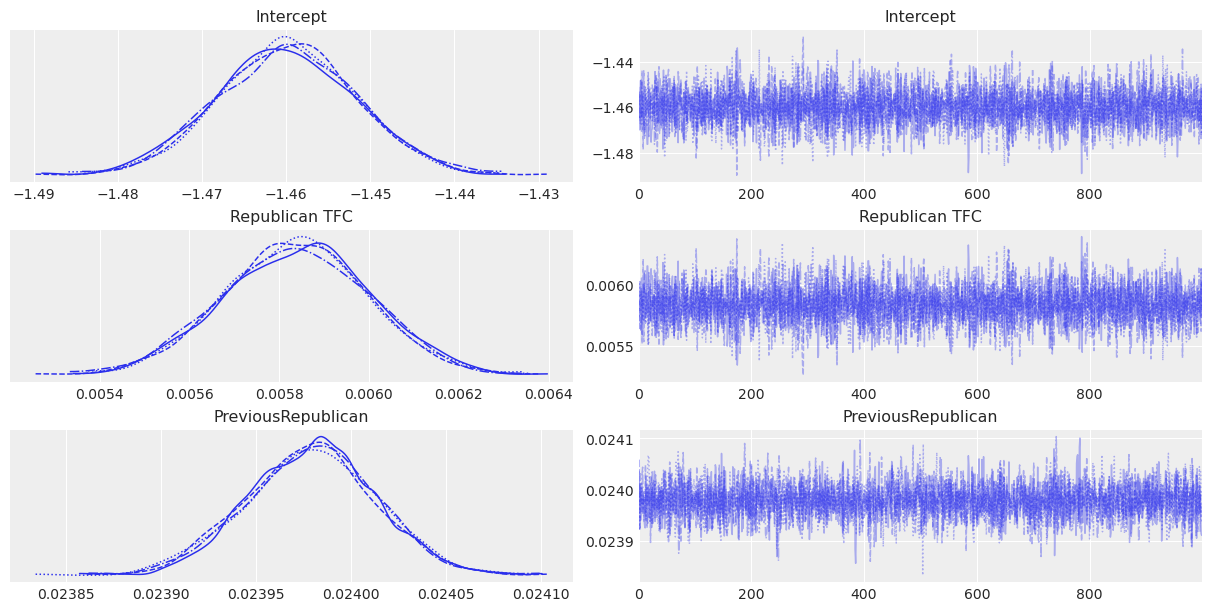

In [693]:
# Binomial PVI and TFC model
def prob_to_count(res):
    return round(10*res)

# Previous best is 'p({prob_to_count(Republican)}, 1000) ~ "Republican TFC" + PreviousRepublican'
pvi_tfc_binomial_model = Model('p({prob_to_count(RepublicanNotBlowout)}, 1000) ~ "Republican TFC" + PreviousRepublican',
                           congressional_district_data,
                           family='binomial',
                           dropna=True)
print(pvi_tfc_binomial_model)
pvi_tfc_binomial_model_results = pvi_tfc_binomial_model.fit()

#house_pvi_model.plot_priors()
az.plot_trace(pvi_tfc_binomial_model_results)
pvi_tfc_binomial_model_summary = az.summary(pvi_tfc_binomial_model_results)
pvi_tfc_binomial_model_summary

In [694]:
congressional_district_data['HouseTFCPVIBinomialPredictions'] = 100 * predict_bambi_model(pvi_tfc_binomial_model, pvi_tfc_binomial_model_results, 'p(I(prob_to_count(RepublicanNotBlowout)), 1000)_mean', congressional_district_data)
congressional_district_data['HouseTFCPVIBinomialPredictions'].loc[congressional_district_data['Republican'] > blow_out_factor] = 100
congressional_district_data['HouseTFCPVIBinomialPredictions'].loc[congressional_district_data['Republican'] < 100 - blow_out_factor] = 0
print(congressional_district_data['HouseTFCPVIBinomialPredictions'].describe())
print(congressional_district_data['HouseTFCPVIBinomialPredictions'].info())
print(congressional_district_data['HouseTFCPVIBinomialPredictions'])

count    10435.000000
mean        42.505989
std         20.253470
min          0.000000
25%         34.889184
50%         46.270007
75%         56.890510
max        100.000000
Name: HouseTFCPVIBinomialPredictions, dtype: float64
<class 'pandas.core.series.Series'>
Index: 10875 entries, 1972-Alabama-01 to 2020-Wyoming-00
Series name: HouseTFCPVIBinomialPredictions
Non-Null Count  Dtype  
--------------  -----  
10435 non-null  float64
dtypes: float64(1)
memory usage: 169.9+ KB
None
1972-Alabama-01            NaN
1972-Alabama-02            NaN
1972-Alabama-03            NaN
1972-Alabama-04            NaN
1972-Alabama-05            NaN
                       ...    
2020-Wisconsin-05    57.220801
2020-Wisconsin-06    53.369893
2020-Wisconsin-07    55.983910
2020-Wisconsin-08    58.215599
2020-Wyoming-00      58.215599
Name: HouseTFCPVIBinomialPredictions, Length: 10875, dtype: float64


/var/folders/zy/yx7hnqcj12l_tr6nnprm66kh0000gn/T/ipykernel_24272/2269490325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congressional_district_data['HouseTFCPVIBinomialPredictions'].loc[congressional_district_data['Republican'] > blow_out_factor] = 100
/var/folders/zy/yx7hnqcj12l_tr6nnprm66kh0000gn/T/ipykernel_24272/2269490325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congressional_district_data['HouseTFCPVIBinomialPredictions'].loc[congressional_district_data['Republican'] < 100 - blow_out_factor] = 0


1996-South Carolina-02    66.545050
1980-Virginia-02          65.892248
2008-Texas-11             65.239159
1980-Louisiana-01         64.492248
2016-Texas-04             64.136237
                            ...    
1988-Pennsylvania-20       0.000000
1988-Tennessee-04          0.000000
1988-Tennessee-05          0.000000
1988-Tennessee-09          0.000000
1972-Alabama-07            0.000000
Length: 10435, dtype: float64


Republican  HouseTFCPVIBinomialPredictions  House PVI  \
1996-South Carolina-02       89.76                       23.214950        NaN   
1980-Virginia-02             89.80                       23.907752        NaN   
2008-Texas-11                88.30                       23.060841        NaN   
1980-Louisiana-01            88.40                       23.907752        NaN   
2016-Texas-04                88.00                       23.863763        NaN   
...                            ...                             ...        ...   
1988-Pennsylvania-20          0.00                        0.000000        NaN   
1988-Tennessee-04             0.00                        0.000000        NaN   
1988-Tennessee-05             0.00                        0.000000        NaN   
1988-Tennessee-09             0.00                        0.000000        NaN   
1972-Alabama-07               0.00                        0.000000        NaN   

                        Republican TFC  PreviousRepublican  TimeInOffice  \
1996-South Carolina-02       45.173843                 0.0            26   
1980-Virginia-02             51.763858                 0.0            12   
2008-Texas-11                43.689411                 0.0             4   
1980-Louisiana-01            51.763858                 0.0             3   
2016-Texas-04                51.349377                 0.0             2   
...                                ...                 ...           ...   
1988-Pennsylvania-20         50.559138                 0.0            20   
1988-Tennessee-04            50.559138                 0.0             6   
1988-Tennessee-05            50.559138                39.9             0   
1988-Tennessee-09            50.559138                 0.0            14   
1972-Alabama-07              56.910568                 NaN             4   

                        LongTimeInOffice         BlowOut  
1996-South Carolina-02              True      Blow-out D  
1980-Virginia-02                    True      Blow-out D  
2008-Texas-11                      False      Blow-out D  
1980-Louisiana-01                  False      Blow-out D  
2016-Texas-04                      False      Blow-out D  
...                                  ...             ...  
1988-Pennsylvania-20                True      Blow-out D  
1988-Tennessee-04                  False      Blow-out D  
1988-Tennessee-05                  False  Not Blow-out D  
1988-Tennessee-09                   True      Blow-out D  
1972-Alabama-07                    False  Not Blow-out D  

[10435 rows x 8 columns]

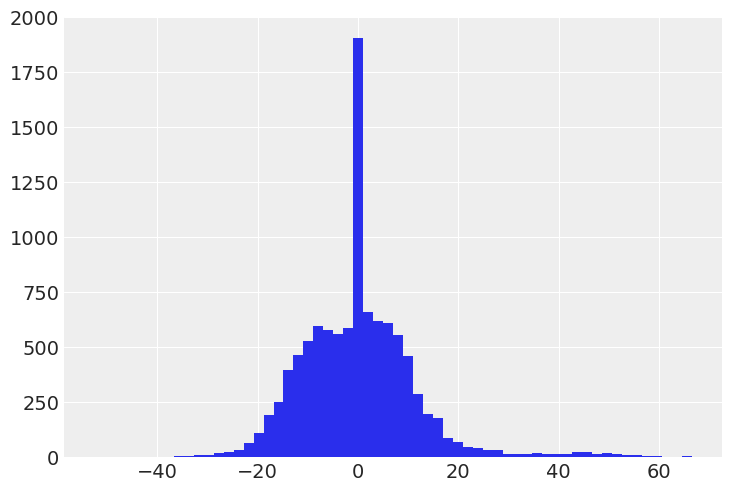

In [695]:
diff = (congressional_district_data['Republican'] - congressional_district_data['HouseTFCPVIBinomialPredictions'])
diff.dropna().hist(bins=60, )
print(abs(diff).sort_values(ascending=False).dropna())
congressional_district_data.loc[abs(diff).sort_values(ascending=False).dropna().index][['Republican', 'HouseTFCPVIBinomialPredictions' ,'House PVI', 'Republican TFC','PreviousRepublican', 'TimeInOffice', 'LongTimeInOffice',  'BlowOut']]

rocauc 0.8683735243766573
accuracy 0.8754022988505747
rmse 11.507861756328618
Difference Standard Deviation 11.50837018187833
This would suggest that in any given year, the model predicts only an average of 371.32 correctly, and max 412.0 correctly
Each of these is the number of correct predictions in a given year.
count     25.000000
mean     371.320000
std       69.542984
min       55.000000
25%      368.000000
50%      393.000000
75%      401.000000
max      412.000000
Name: Year, dtype: float64


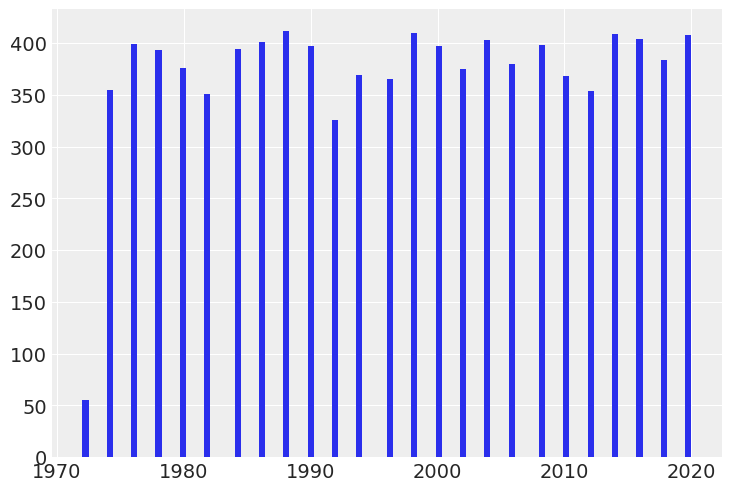

In [698]:
from sklearn.metrics import roc_auc_score
print('rocauc', roc_auc_score(congressional_district_data['Republican']>50,congressional_district_data['HouseTFCPVIBinomialPredictions']>50))
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(congressional_district_data['Republican']>50, congressional_district_data['HouseTFCPVIBinomialPredictions']>50))
print('rmse', rmse(congressional_district_data, 'Republican', 'HouseTFCPVIBinomialPredictions'))
print('Difference Standard Deviation', diff.std())
bool_levels_with_nan_neg_1 = lambda x: -1 if np.isnan(x) else int(x>50)
rep = congressional_district_data['Republican'].apply(bool_levels_with_nan_neg_1)
pred = congressional_district_data['HouseTFCPVIBinomialPredictions'].apply(bool_levels_with_nan_neg_1)
correct_predictions = congressional_district_data.loc[((rep == 1) & (pred == 1))| ((rep == 0) & (pred == 0)) | (rep==-1)]
# correct_predictions = congressional_district_data.loc[rep==pred]
correct_predictions['Year'].hist(bins=100)
value_counts = correct_predictions['Year'].value_counts()
print(f'This would suggest that in any given year, the model predicts only an average of {value_counts.describe()["mean"]} correctly, and max {value_counts.describe()["max"]} correctly')
print('Each of these is the number of correct predictions in a given year.')
print(value_counts.describe())




# House District Classification
Let's do a classification model instead, since for house races, that is what we care about most--who won, not by what margin.

In [619]:
congressional_district_data['RepublicanWon'] = congressional_district_data['Republican'] > 50
house_district_classifier_model = Model('RepublicanWon ~ "Republican TFC" + "House PVI" + "PreviousRepublican"',
                             congressional_district_data,
                             # priors=congressional_district_data_priors,
                             dropna=True,
                             family='bernoulli')
print(house_district_classifier_model)
house_district_classifier_model_results = house_district_classifier_model.fit(draws=3000)
print(house_district_classifier_model_results )

Automatically removing 3408/10875 rows from the dataset.


Formula: RepublicanWon ~ "Republican TFC" + "House PVI" + "PreviousRepublican" + SimulatedPoll
Family name: Bernoulli
Link: logit
Observations: 7467
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 31.6155)
    Republican TFC ~ Normal(mu: 0.0, sigma: 0.6002)
    House PVI ~ Normal(mu: 0.0, sigma: 0.1633)
    PreviousRepublican ~ Normal(mu: 0.0, sigma: 0.1557)
    SimulatedPoll ~ Normal(mu: 0.0, sigma: 0.1193)


Modeling the probability that RepublicanWon==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [SimulatedPoll, PreviousRepublican, House PVI, Republican TFC, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)

The default initialization using init='auto' has failed, trying to recover by switching to init='adapt_diag'
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [SimulatedPoll, PreviousRepublican, House PVI, Republican TFC, Intercept]


/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniforge/base/envs/ElectionForecasting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 31 seconds.
The acceptance probability does not

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept          -17.566  0.946 -19.260  -15.698      0.009    0.006   
Republican TFC      -0.011  0.013  -0.035    0.015      0.000    0.000   
House PVI            0.008  0.010  -0.011    0.027      0.000    0.000   
PreviousRepublican   0.090  0.010   0.071    0.109      0.000    0.000   
SimulatedPoll        0.271  0.009   0.254    0.288      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
Intercept            10808.0    8695.0    1.0  
Republican TFC       12249.0    7822.0    1.0  
House PVI             8950.0    8564.0    1.0  
PreviousRepublican    8993.0    8116.0    1.0  
SimulatedPoll        10313.0    8685.0    1.0

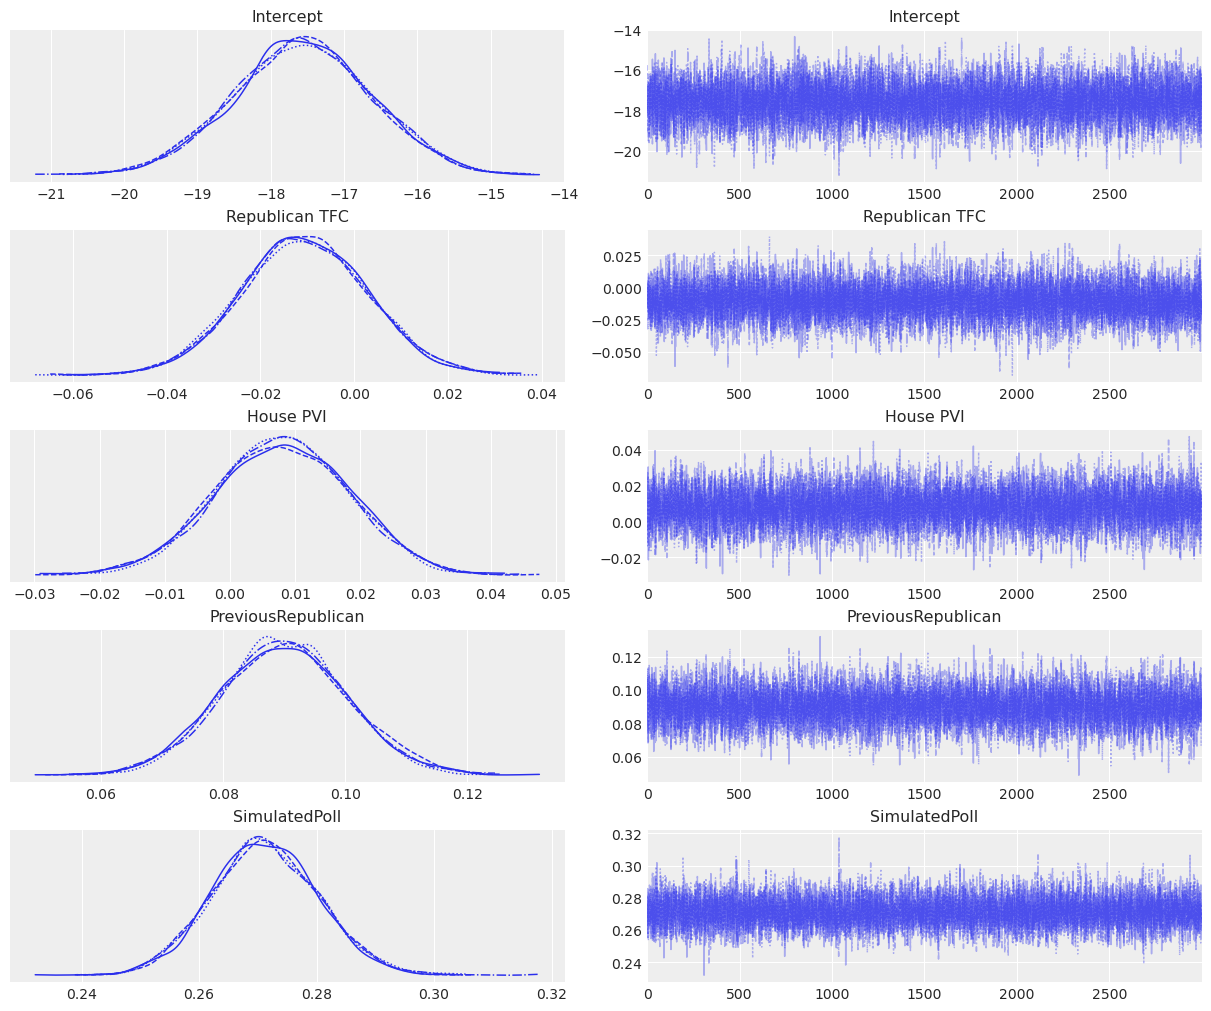

In [620]:
# house_district_classifier_model.plot_priors()
az.plot_trace(house_district_classifier_model_results)
house_district_classifier_model_summary = az.summary(house_district_classifier_model_results)
house_district_classifier_model_summary

In [621]:
house_district_classifier_model_results

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

KeyError: 'Republican TFC'

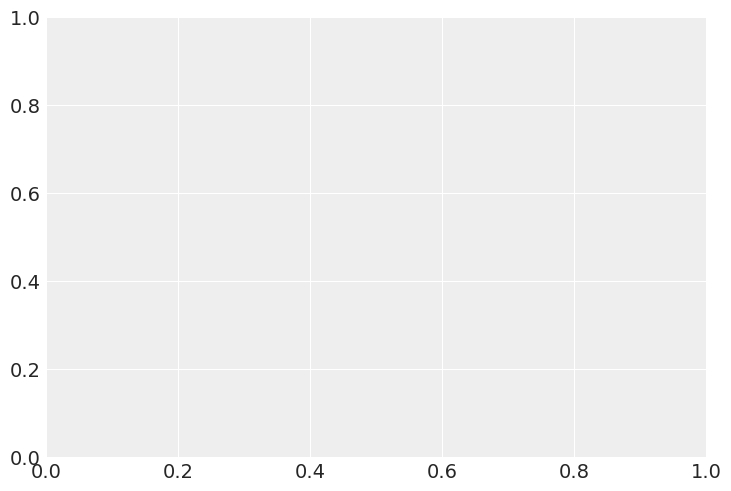

In [622]:
APPROVAL = np.linspace(-50, 50)


fig, ax = plt.subplots()
handles = []
for i in range(2):
    color = f"C{i}"
    label = f"Parties Match : {bool(i)}"
    handles.append(mlines.Line2D([], [], color=color, label=label, lw=3))

    new_data = pd.DataFrame({
           'GDP': np.ones_like(APPROVAL) * (congressional_district_data['GDP'].mean()),
           'Incumbent': np.ones_like(APPROVAL) * 0,
           'Net Approval': APPROVAL,
           'PartiesMatch': np.ones_like(APPROVAL) * i
    })
    new_idata = house_district_classifier_model.predict(house_district_classifier_model_results,
                                                        data=new_data,
                                                        kind='mean',
                                                        inplace=False)
    mean = new_idata.posterior["HouseIncumbentWon_mean"].values

    az.plot_hdi(APPROVAL, mean, ax=ax, color=color)
    az.plot_hdi(APPROVAL, mean, ax=ax, color=color, hdi_prob=0.5)

ax.set_xlabel("Net Approval Rating")
ax.set_ylabel("Probability of Incumbent Win")
ax.legend(handles=handles, loc="upper left")



In [623]:
test_predictions = house_district_classifier_model.predict(house_district_classifier_model_results, data=congressional_district_data, inplace=False)
test_means = test_predictions.posterior['RepublicanWon_mean'].mean(axis=1).mean(axis=0).values
test_means = pd.Series(test_means, index=congressional_district_data.index)
test_means

1972-Alabama-01           NaN
1972-Alabama-02           NaN
1972-Alabama-03           NaN
1972-Alabama-04           NaN
1972-Alabama-05           NaN
                       ...   
2020-Wisconsin-05    0.942642
2020-Wisconsin-06    0.948529
2020-Wisconsin-07    0.979389
2020-Wisconsin-08    0.999354
2020-Wyoming-00      0.999849
Length: 10875, dtype: float64

In [624]:
compared = (pd.concat([congressional_district_data[['RepublicanWon', 'Year']], test_means], axis=1).rename(columns={0:'ProbabilityOfWin'})).dropna()
compared

RepublicanWon  Year  ProbabilityOfWin
1976-Alabama-01             True  1976          0.988549
1976-Alabama-02             True  1976          0.905576
1976-Alabama-06             True  1976          0.903966
1976-Alaska-00              True  1976          0.996858
1976-Arizona-01             True  1976          0.533318
...                          ...   ...               ...
2020-Wisconsin-05           True  2020          0.942642
2020-Wisconsin-06           True  2020          0.948529
2020-Wisconsin-07           True  2020          0.979389
2020-Wisconsin-08           True  2020          0.999354
2020-Wyoming-00             True  2020          0.999849

[7467 rows x 3 columns]

In [627]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('roc', roc_auc_score(compared['RepublicanWon'], compared['ProbabilityOfWin']))
print('acc', accuracy_score(compared['RepublicanWon'], compared['ProbabilityOfWin']>.5))


roc 0.9857285804004841
acc 0.9345118521494576


Each of these is the number of correct predictions in a given year.
count     23.000000
mean     301.086957
std       22.003952
min      255.000000
25%      286.000000
50%      301.000000
75%      311.500000
max      344.000000
Name: Year, dtype: float64
This would suggest that in any given year, the model predicts only an average of 301.0869565217391 correctly, and max 344.0 correctly


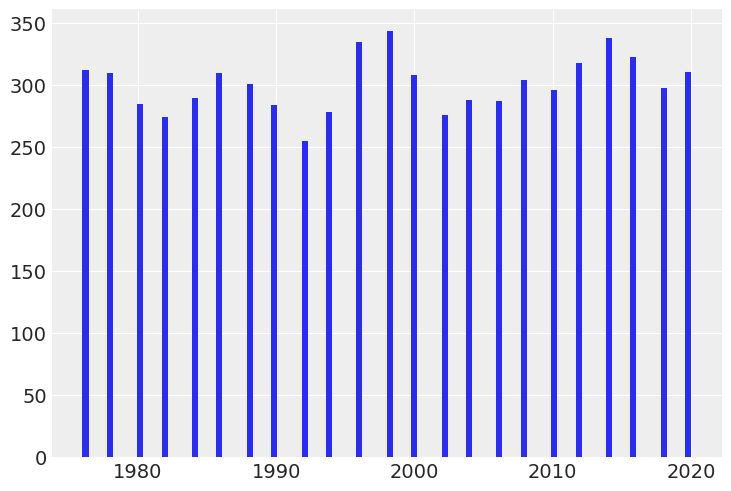

In [628]:
rep_cls = compared['RepublicanWon']
pred_cls = (compared['ProbabilityOfWin']>.7)
correct_predictions_cls = compared.loc[rep_cls==pred_cls]
correct_predictions = congressional_district_data.loc[rep==pred]
correct_predictions_cls['Year'].hist(bins=100)
value_counts_cls = correct_predictions_cls['Year'].value_counts()
print('Each of these is the number of correct predictions in a given year.')
print(value_counts_cls.describe())
print(f'This would suggest that in any given year, the model predicts only an average of {value_counts_cls.describe()["mean"]} correctly, and max {value_counts_cls.describe()["max"]} correctly')